<a href="https://colab.research.google.com/github/mortgad/DLVR/blob/main/DataQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount drive, clone repo

In [1]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/mortgad/DLVR.git
%cd DLVR

Cloning into 'DLVR'...
remote: Enumerating objects: 307, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (149/149), done.
remote: Total 307 (delta 96), reused 33 (delta 15), pack-reused 142 (from 1)
Receiving objects: 100% (307/307), 9.76 MiB | 10.58 MiB/s, done.
Resolving deltas: 100% (158/158), done.
/content/DLVR


# FairFace

In [ ]:
from utils.fairface import load_fairface
df_fairface_train, df_fairface_val = load_fairface()

Downloaded file saved as /content/train_labels.csv
Downloaded file saved as /content/val_labels.csv


In [ ]:
from utils.fairface import preprocess_fairface
df_fairface_eda, df_fairface_code = preprocess_fairface(df_fairface_train, df_fairface_val)

  0%|          | 0/86744 [00:00<?, ?it/s]

  0%|          | 0/10954 [00:00<?, ?it/s]

  0%|          | 0/86744 [00:00<?, ?it/s]

  0%|          | 0/10954 [00:00<?, ?it/s]

  0%|          | 0/10954 [00:00<?, ?it/s]

  0%|          | 0/10954 [00:00<?, ?it/s]

New Race Mapping: {0: 'White', 1: 'Black', 2: 'Asian', 3: 'Indian', 4: 'Others'}


In [ ]:
df_fairface_code.head()

file  age_code  gender_code  race_code
0  /content/extracted/train/1.jpg         6            0          2
1  /content/extracted/train/2.jpg         4            1          3
2  /content/extracted/train/3.jpg         1            1          1
3  /content/extracted/train/4.jpg         3            1          3
4  /content/extracted/train/5.jpg         3            1          3

## Display FairFace



------ 0 ------





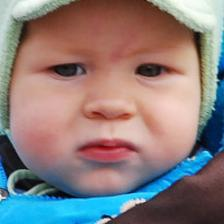

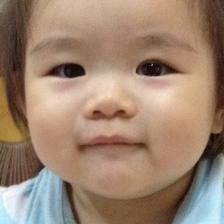

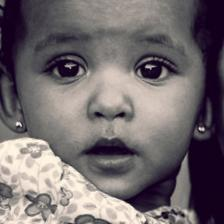

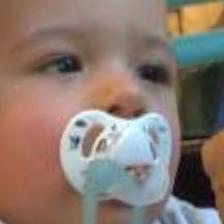

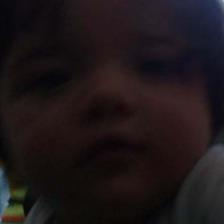

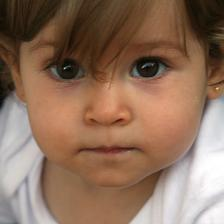

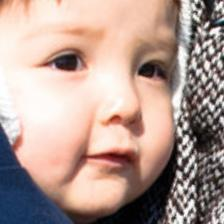

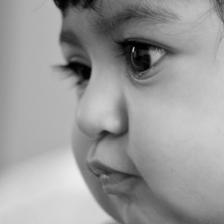

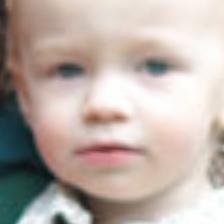

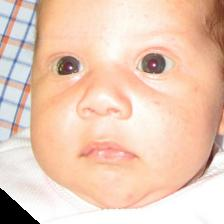



------ 1 ------





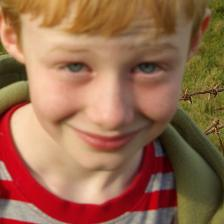

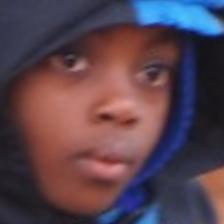

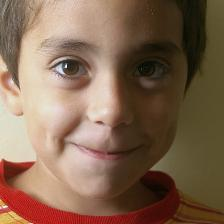

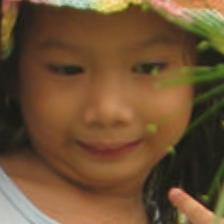

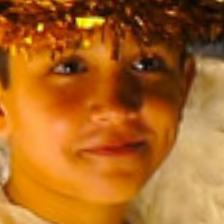

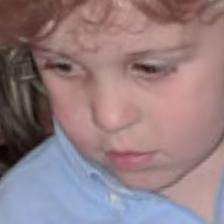

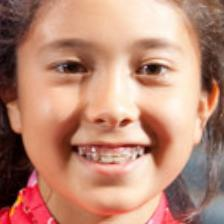

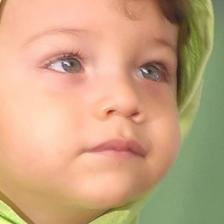

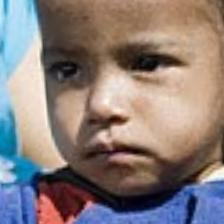

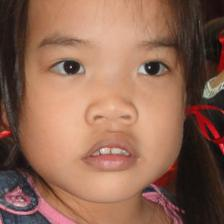



------ 2 ------





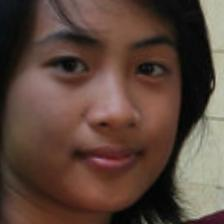

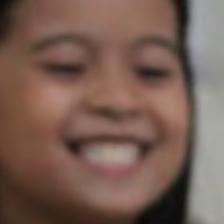

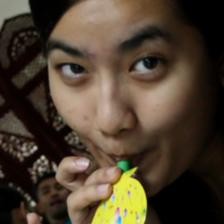

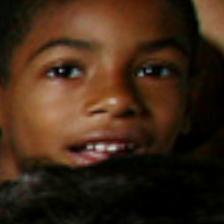

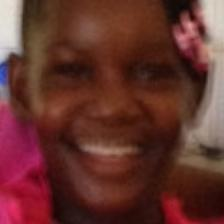

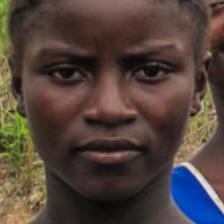

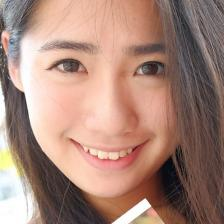

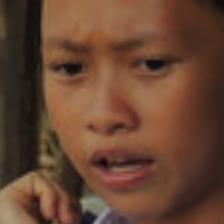

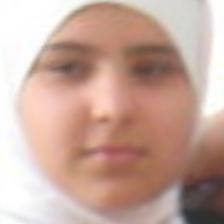

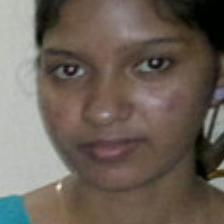



------ 3 ------





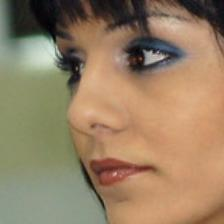

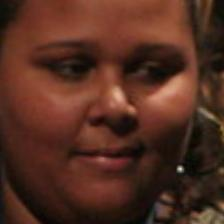

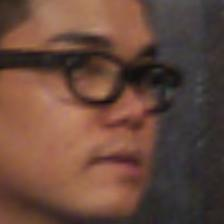

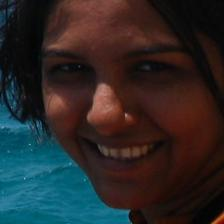

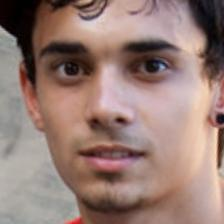

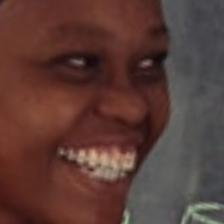

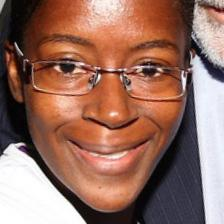

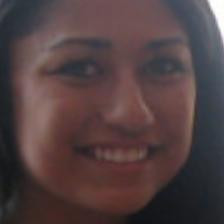

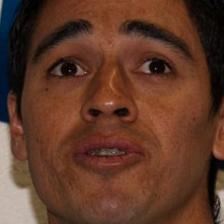

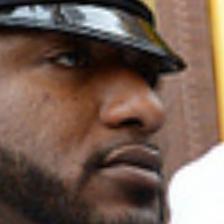



------ 4 ------





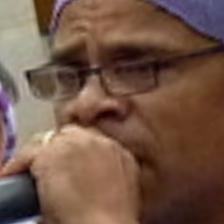

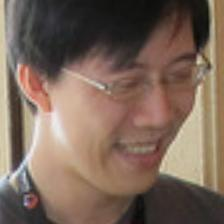

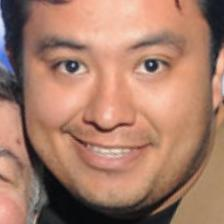

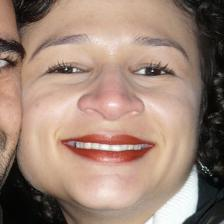

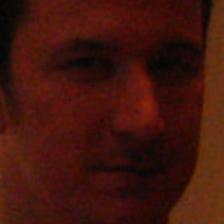

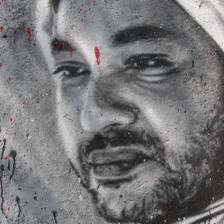

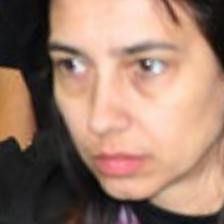

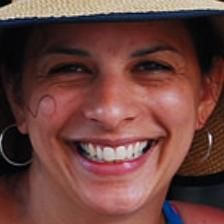

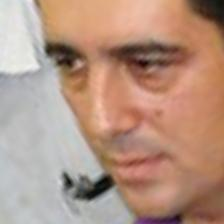

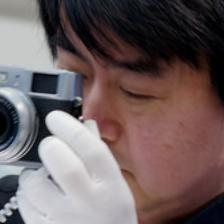



------ 5 ------





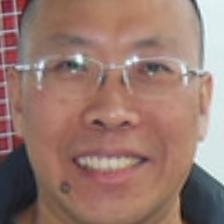

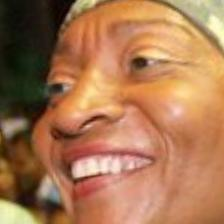

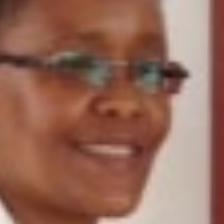

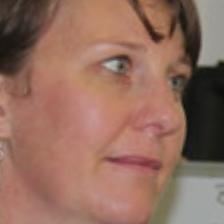

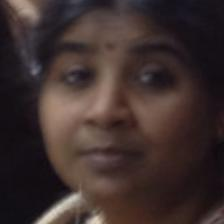

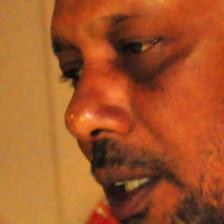

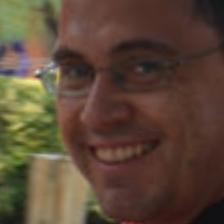

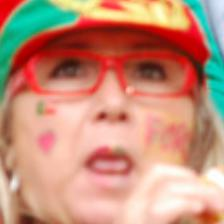

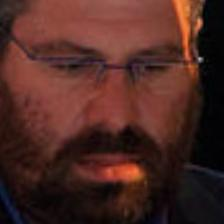

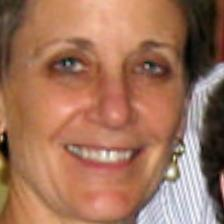



------ 6 ------





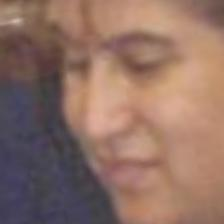

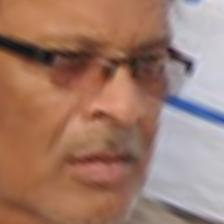

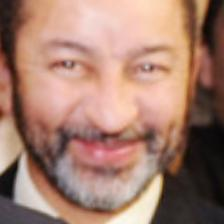

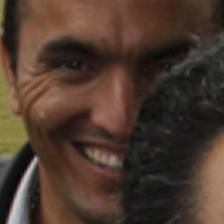

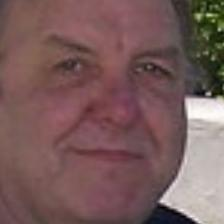

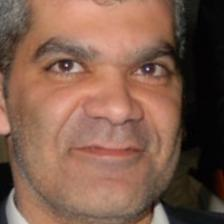

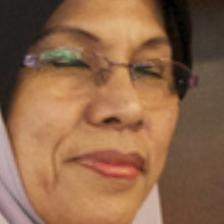

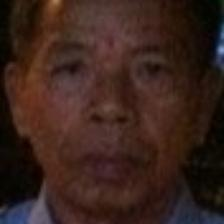

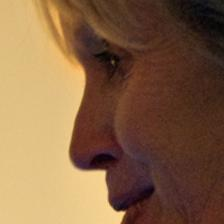

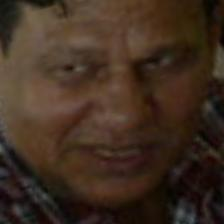



------ 7 ------





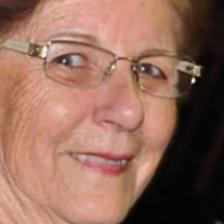

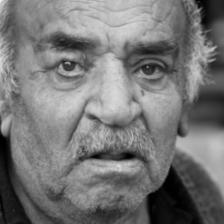

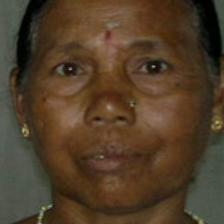

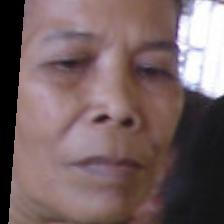

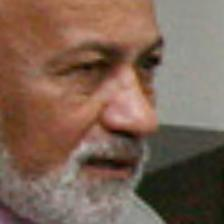

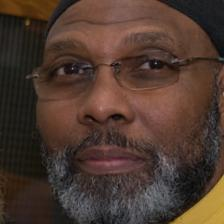

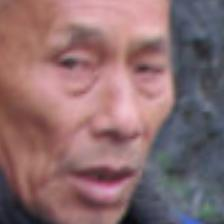

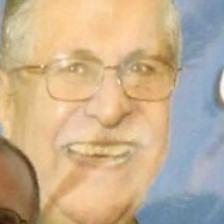

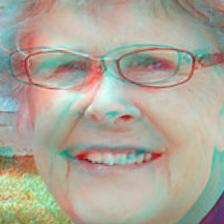

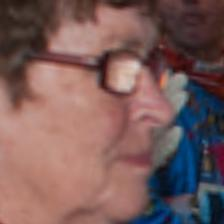



------ 8 ------





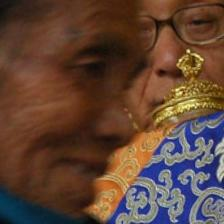

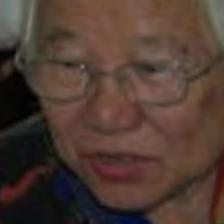

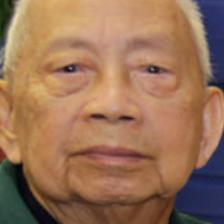

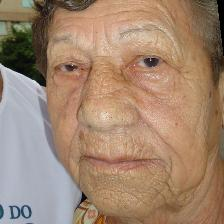

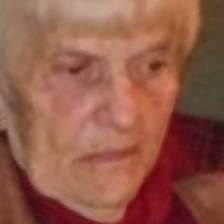

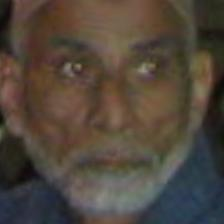

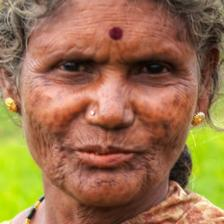

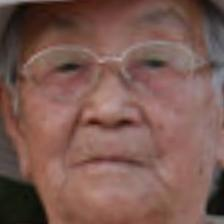

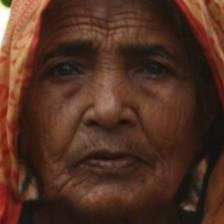

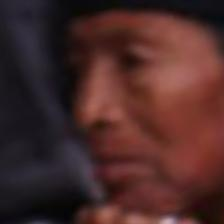

In [ ]:
from IPython.display import Image, display

age_codes = list(set(df_fairface_code['age_code']))

for code in age_codes:
    print(f"\n\n------ {code} ------\n\n\n")
    # Display 10 random images
    df_age = df_fairface_code[df_fairface_code['age_code'] == code]
    df_age = df_age.sample(10)
    for index, row in df_age.iterrows():
        image_path = row['file']
        # Display the image
        display(Image(filename=image_path, width=200))

# UTKFace

In [3]:
from utils.utkface import load_utkface
load_utkface()

Extracted part3.tar.gz
Extracted part2.tar.gz
Extracted part1.tar.gz


In [4]:
from utils.utkface import preprocess_utkface
df_utkface, df_utkface_raw = preprocess_utkface()

Deleted: /content/extracted/part3/44_1_4_20170116235150272.pg
Deleted: /content/extracted/part3/55_0_0_20170116232725357jpg
Deleted: /content/extracted/part3/.DS_Store
Deleted: /content/extracted/part1/61_3_20170109150557335.jpg
Deleted: /content/extracted/part1/61_1_20170109142408075.jpg
Deleted: /content/extracted/part2/53__0_20170116184028385.jpg
Deleted: /content/extracted/part2/39_1_20170116174525125.jpg
Deleted: /content/extracted/part3/24_0_1_20170116220224657 .jpg
Processing from: /content/extracted/part1
Processing from: /content/extracted/part2
Processing from: /content/extracted/part3


In [5]:
df_utkface_raw.head()

file  age_raw  gender_code  \
0  /content/extracted/part1/90_0_0_20170111222243...       90            0   
1  /content/extracted/part1/61_0_3_20170109131758...       61            0   
2  /content/extracted/part1/77_0_0_20170111202327...       77            0   
3  /content/extracted/part1/25_1_2_20170105161718...       25            1   
4  /content/extracted/part1/19_0_2_20170102234958...       19            0   

   race_code    age  age_code  gender    race  
0          0    70+         8    Male   White  
1          3  60-69         7    Male  Indian  
2          0    70+         8    Male   White  
3          2  20-29         3  Female   Asian  
4          2  10-19         2    Male   Asian

## Display UTKFace



------ 0 ------





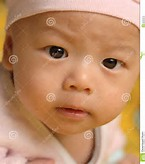

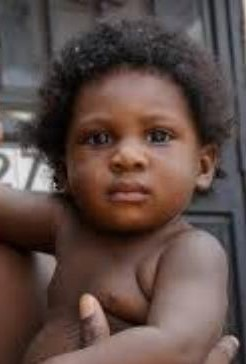

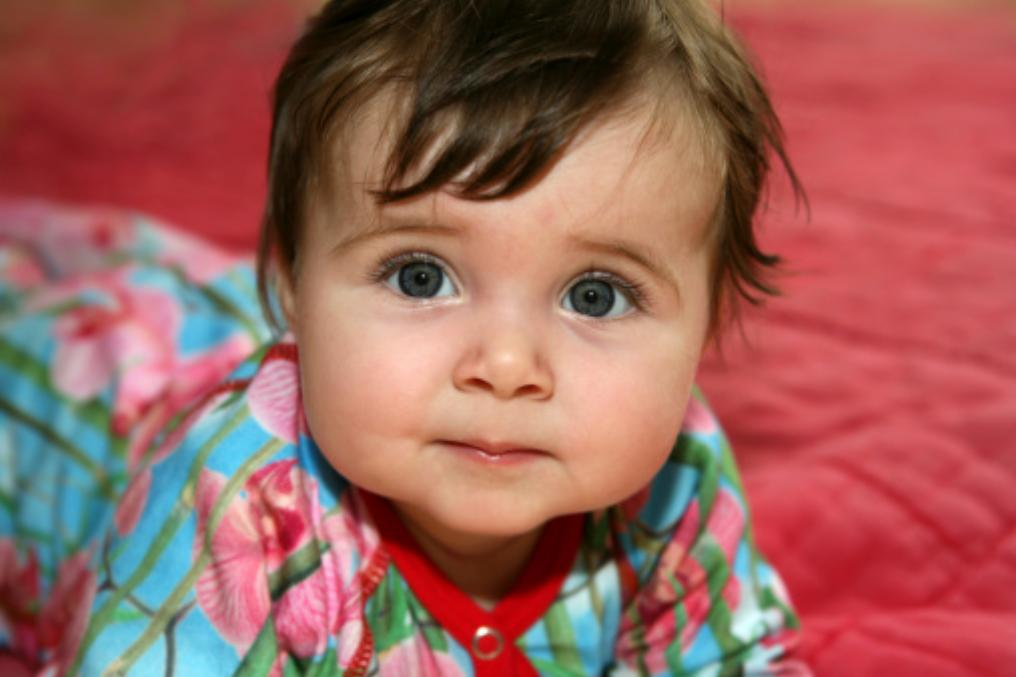

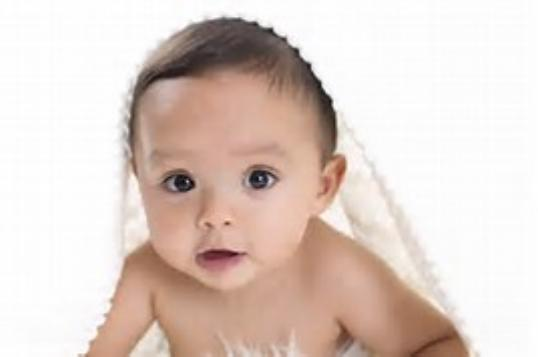

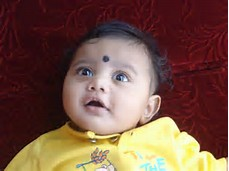

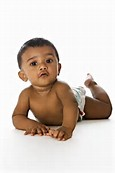

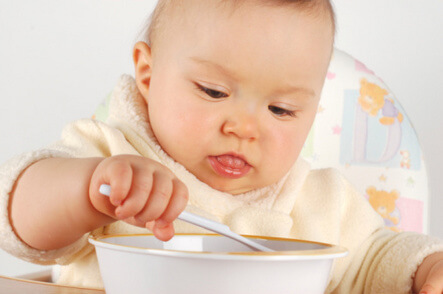

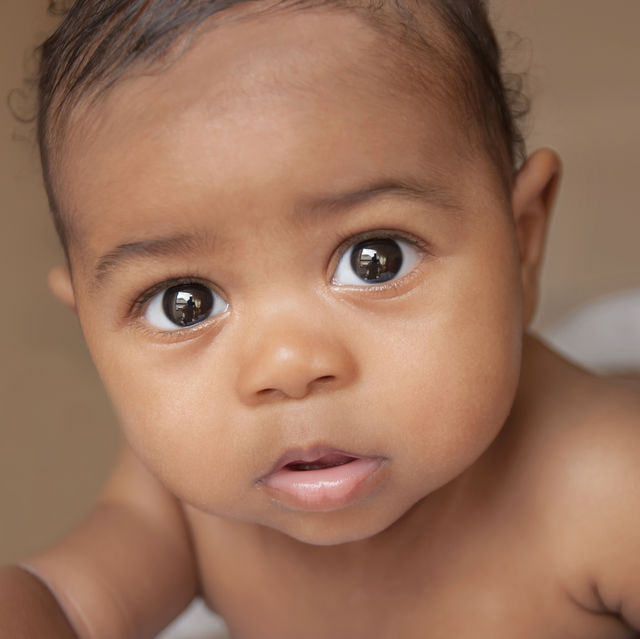

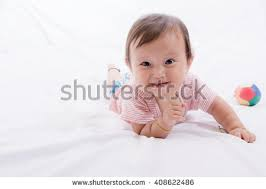

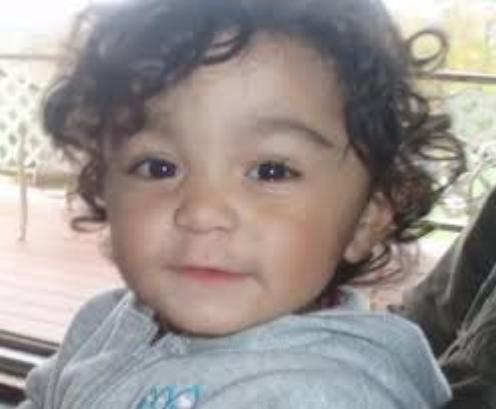



------ 1 ------





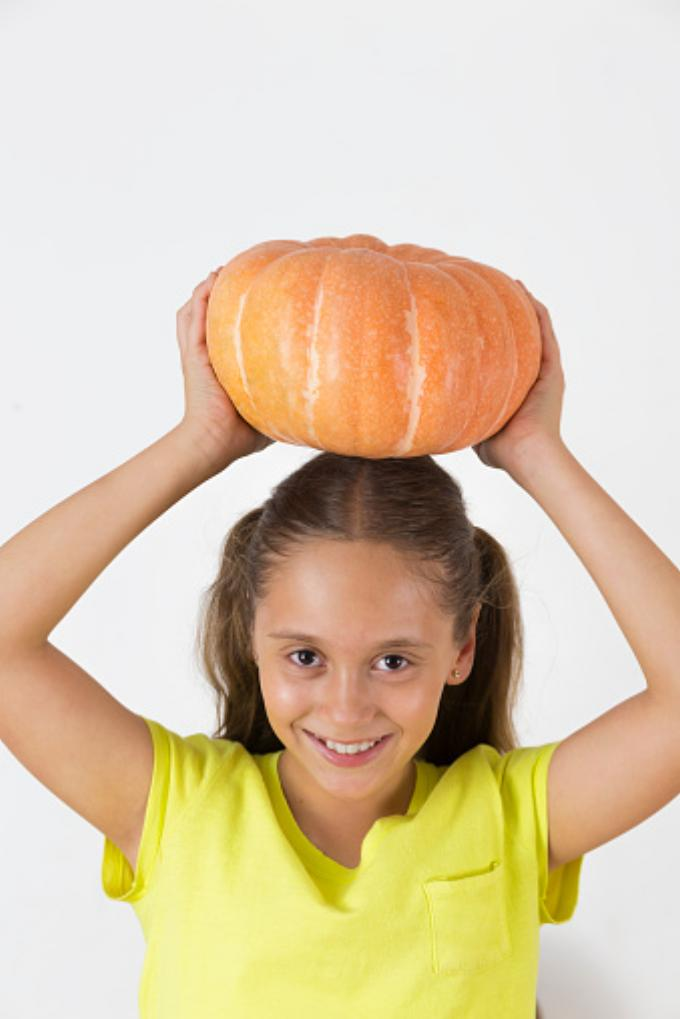

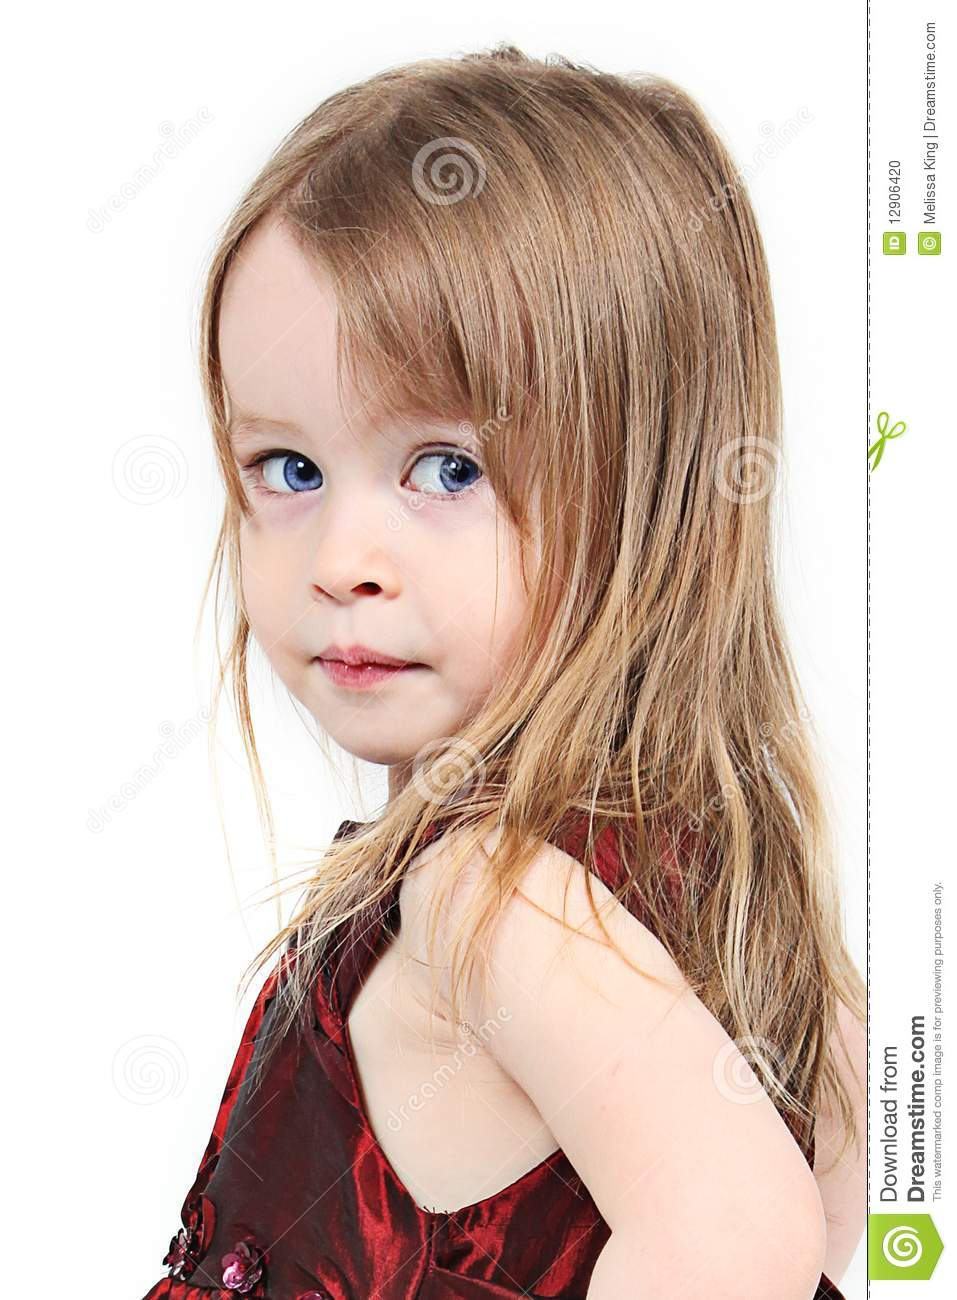

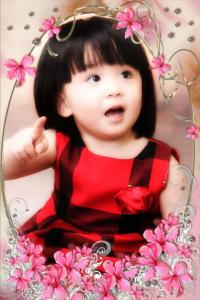

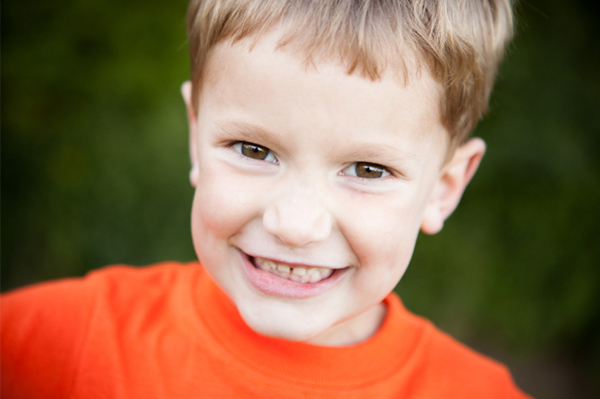

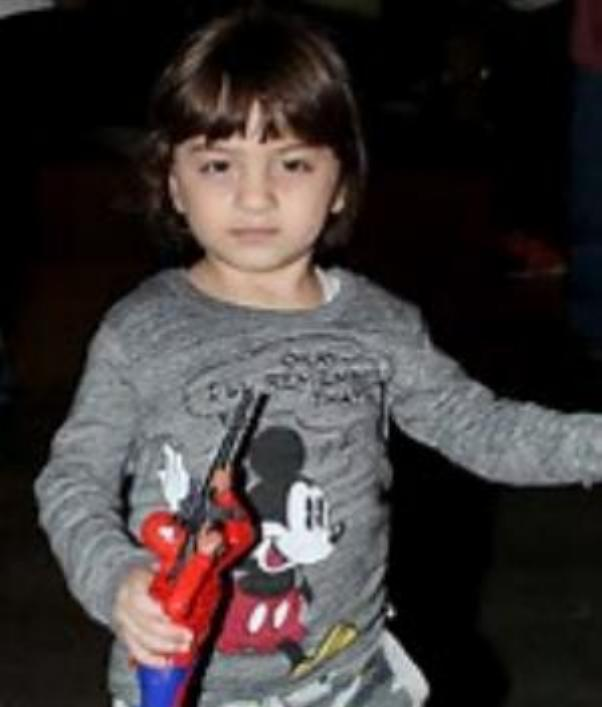

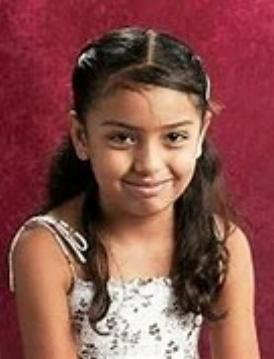

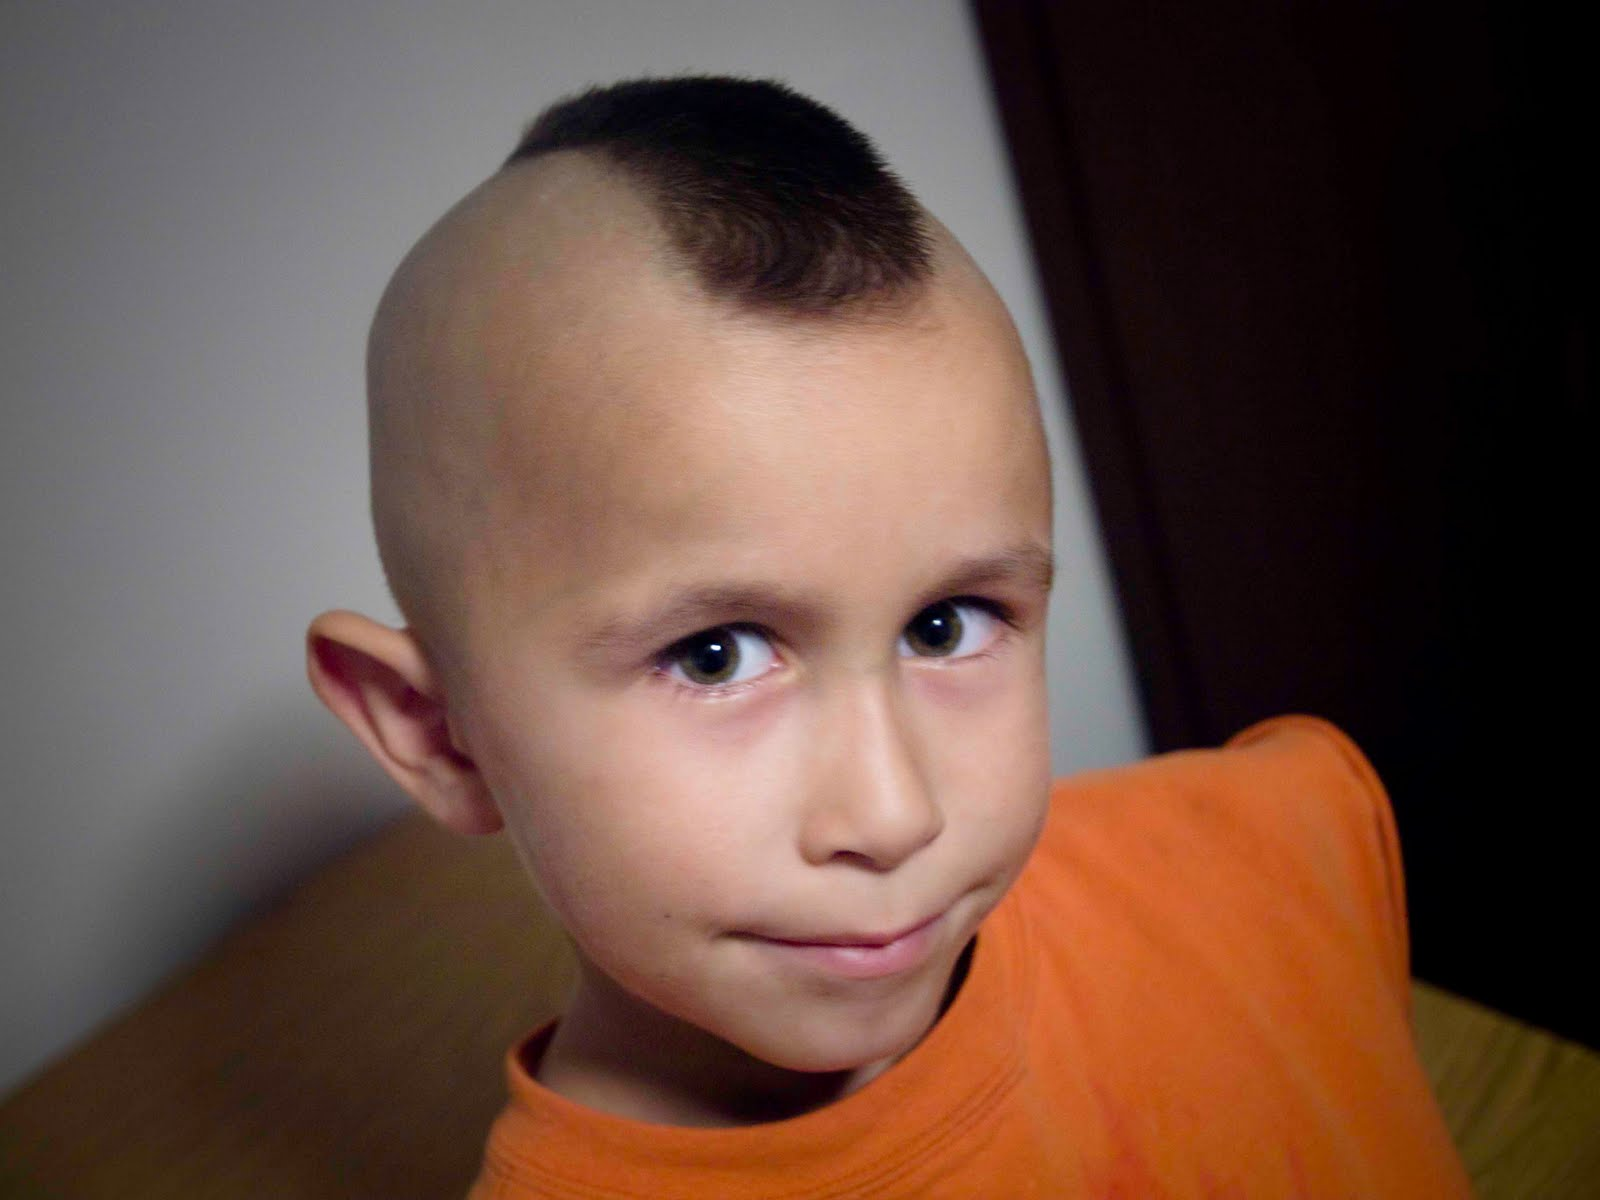

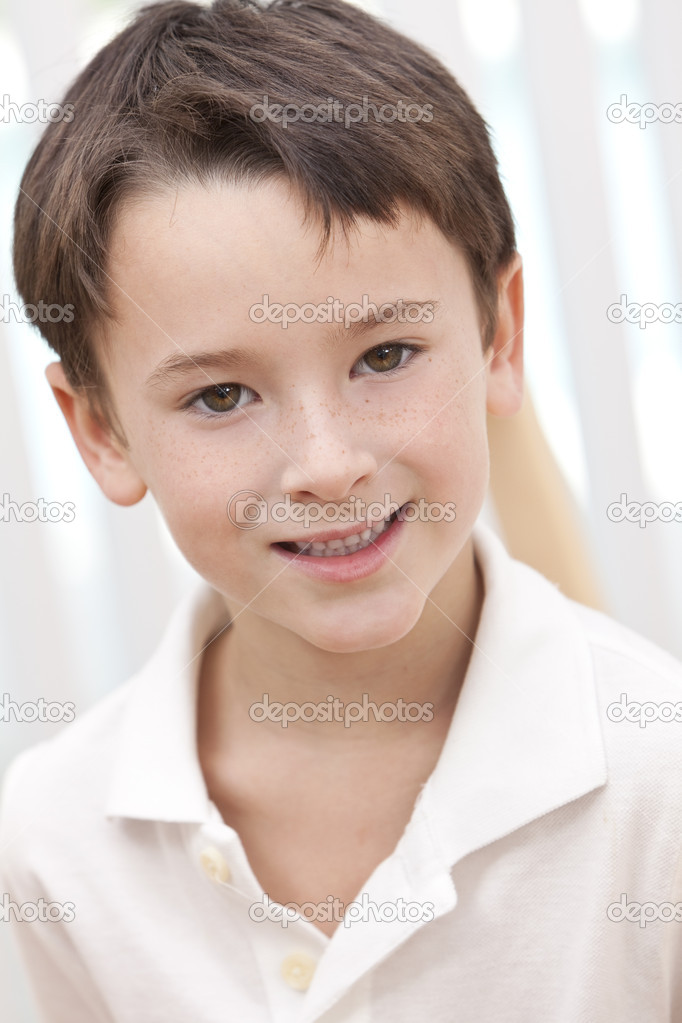

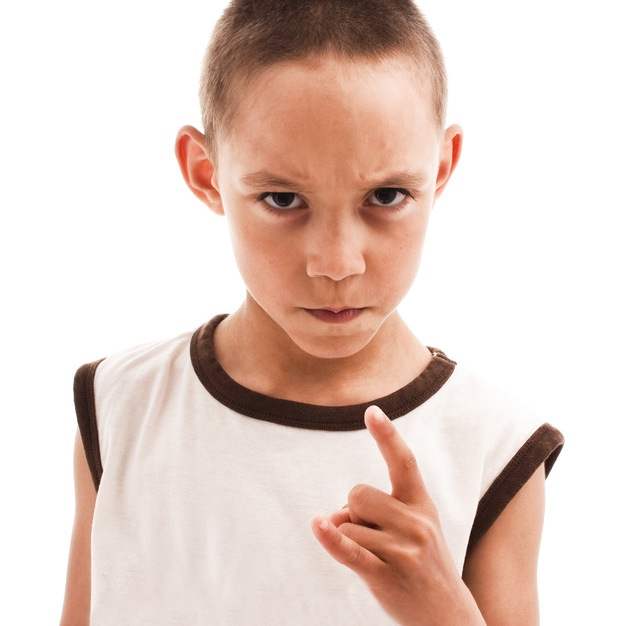

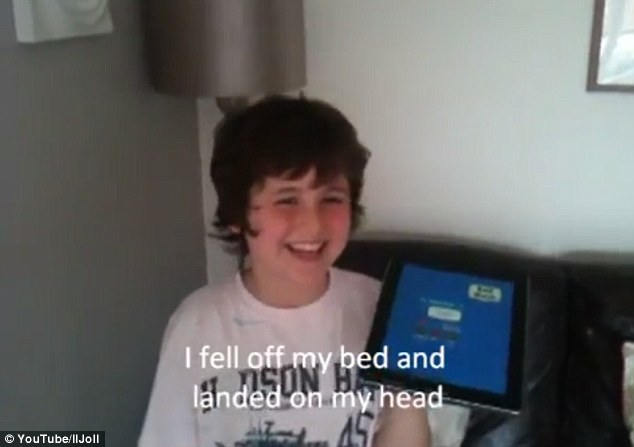



------ 2 ------





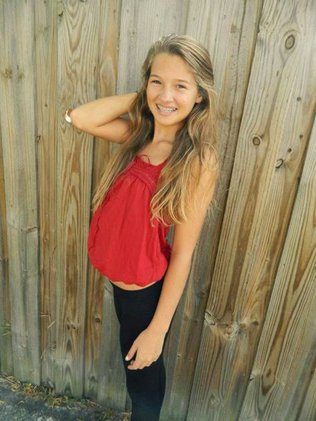

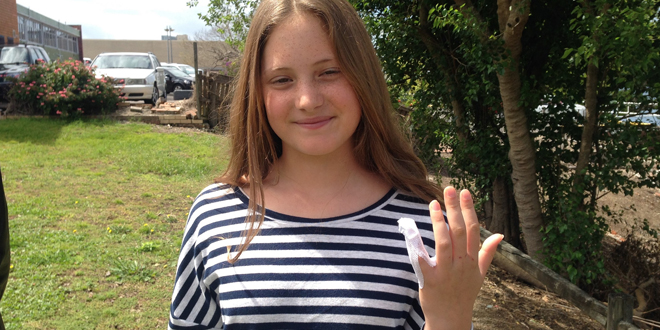

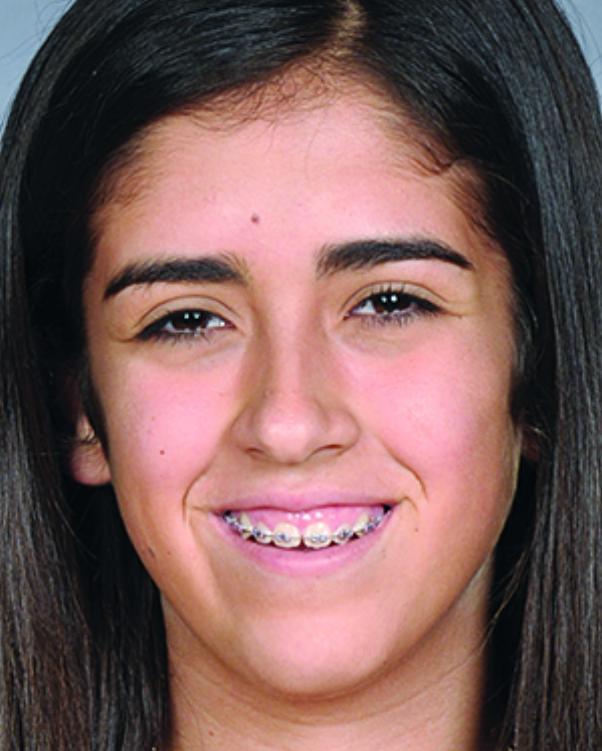

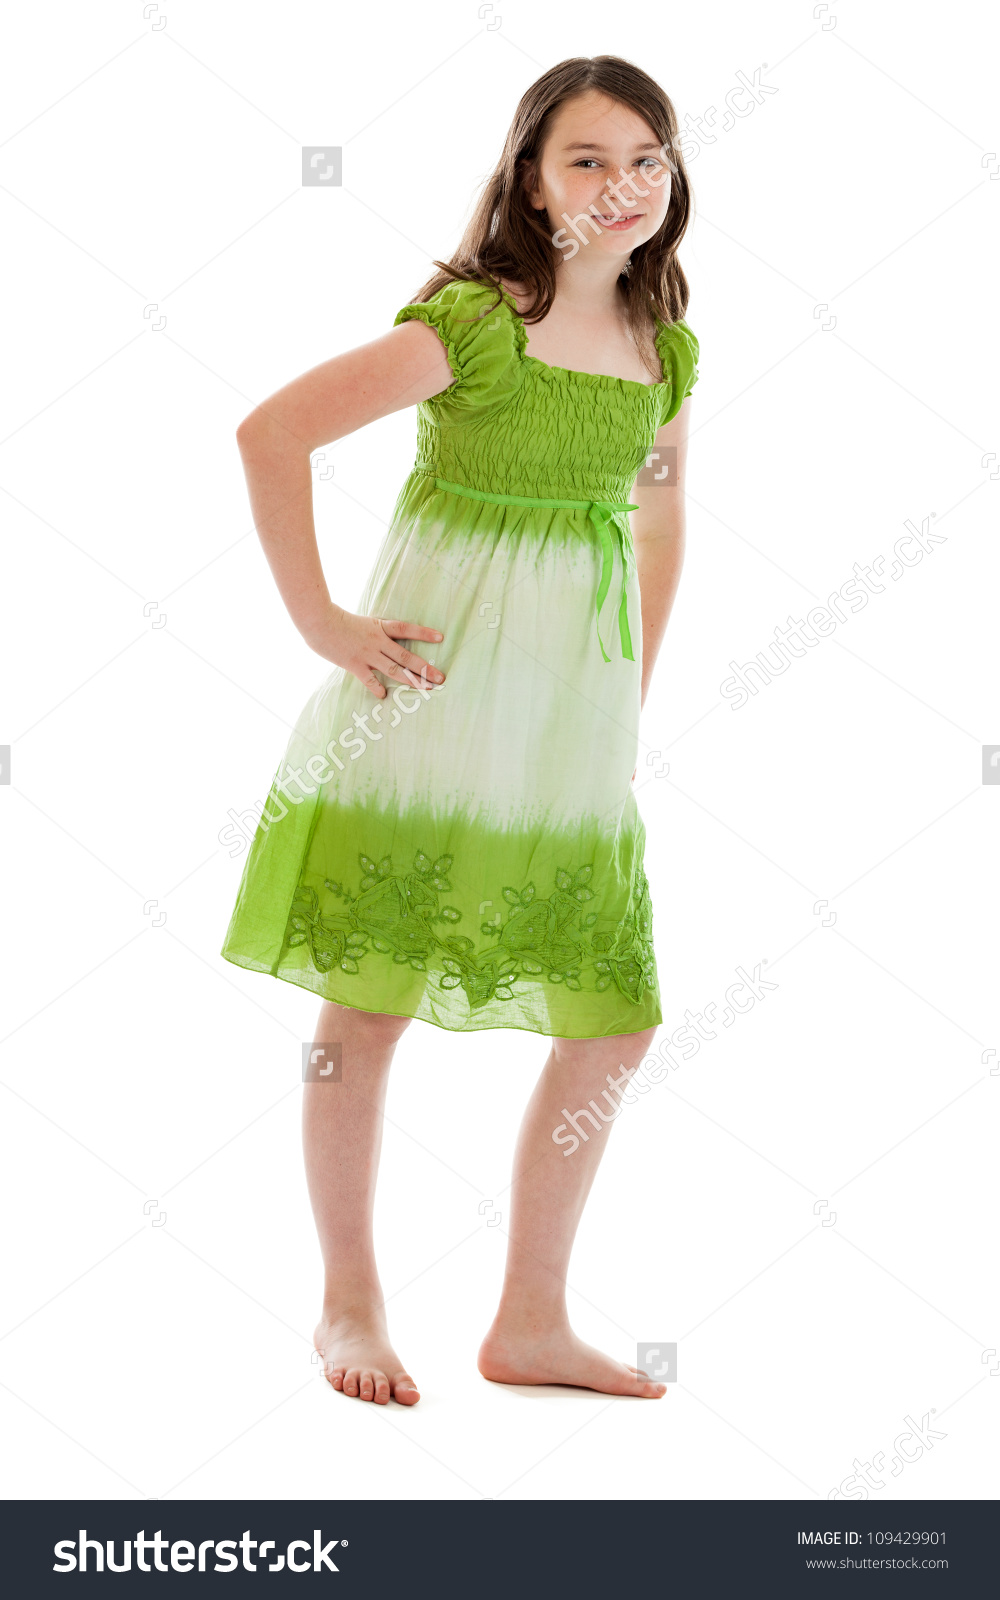

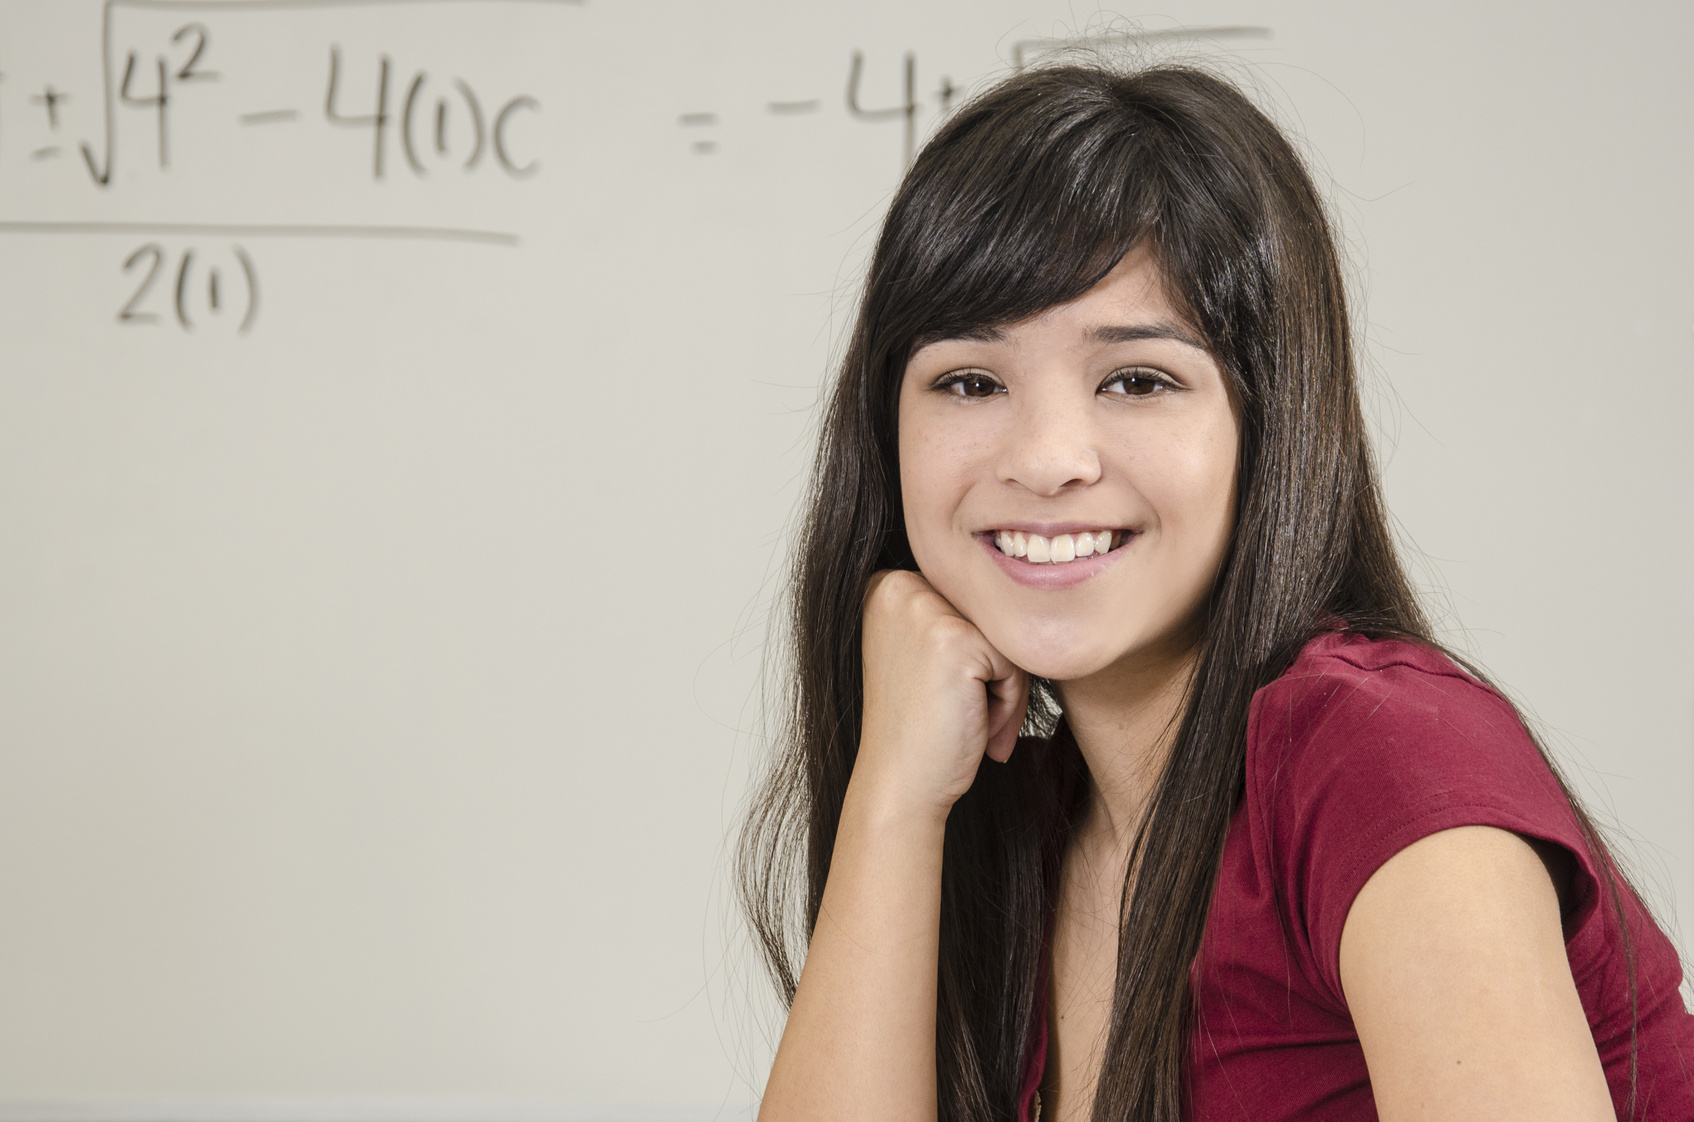

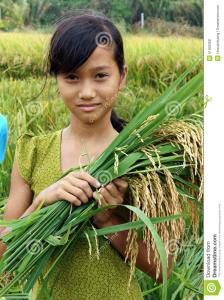

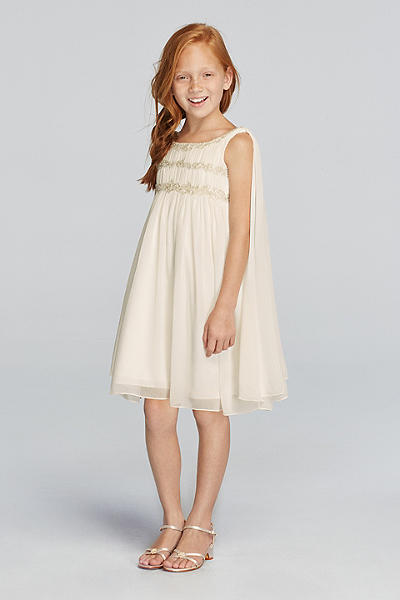

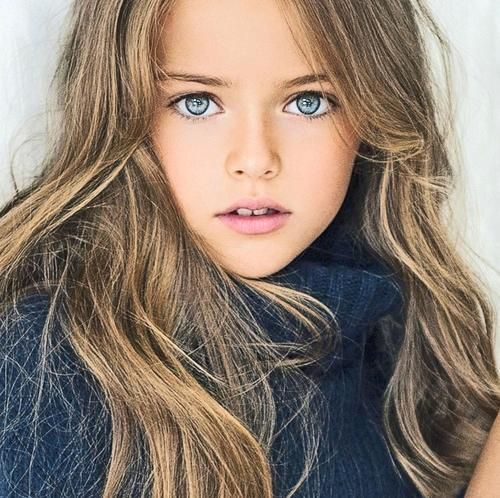

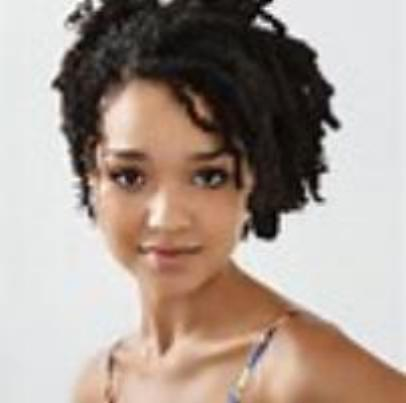

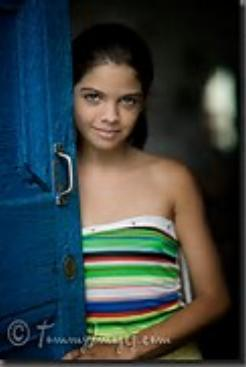



------ 3 ------





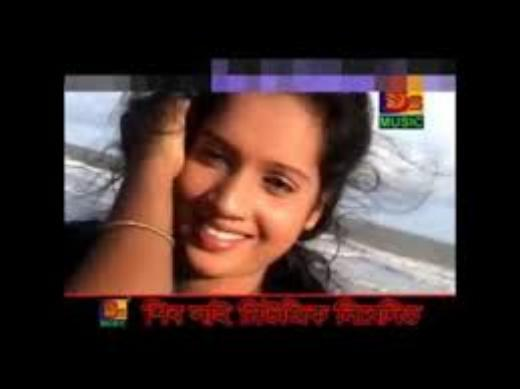

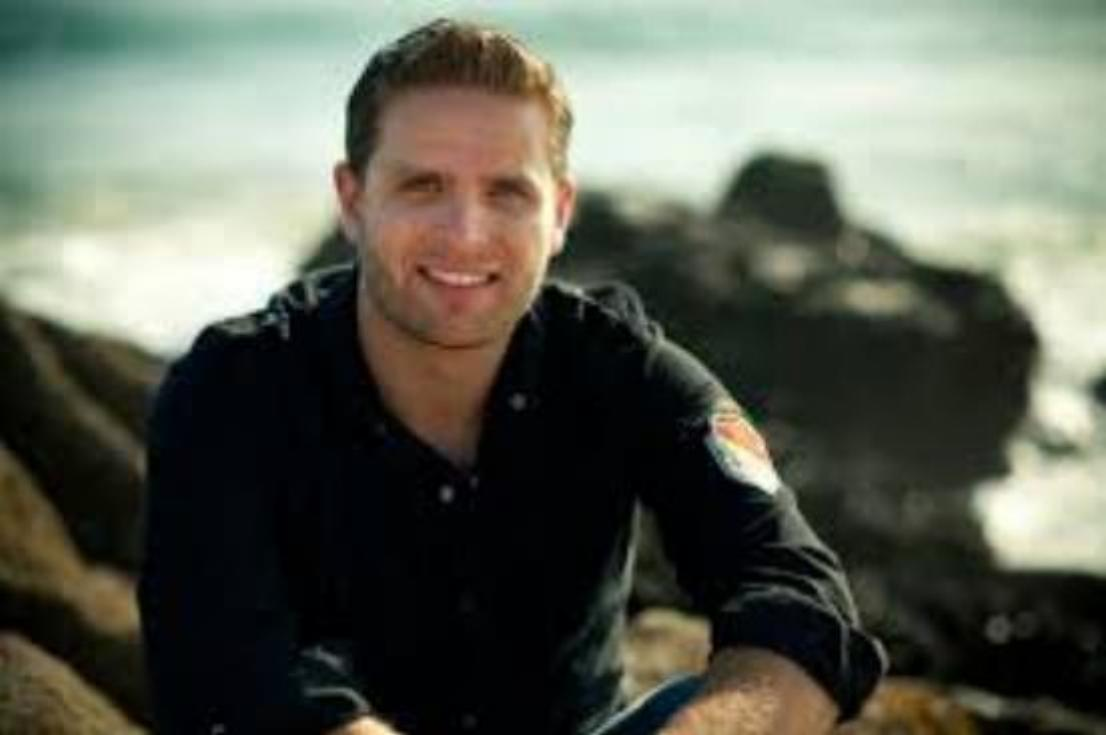

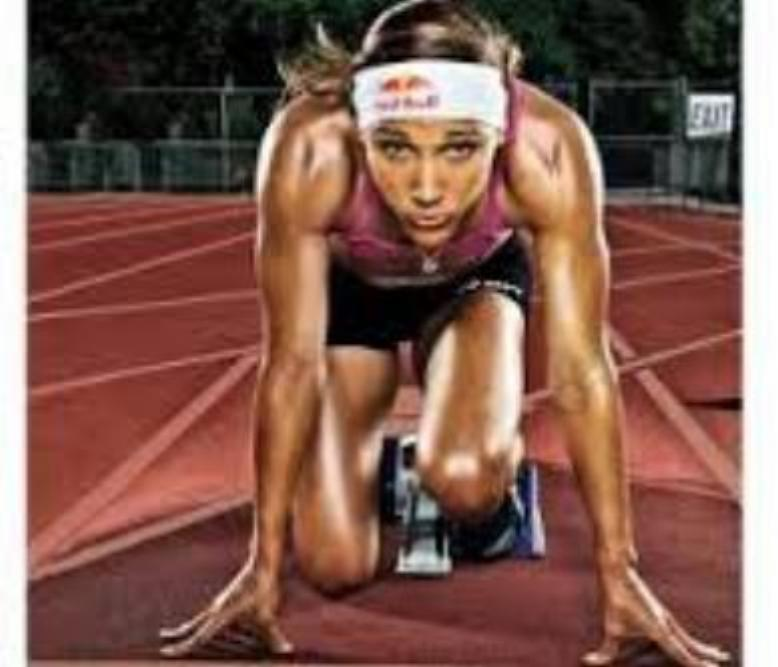

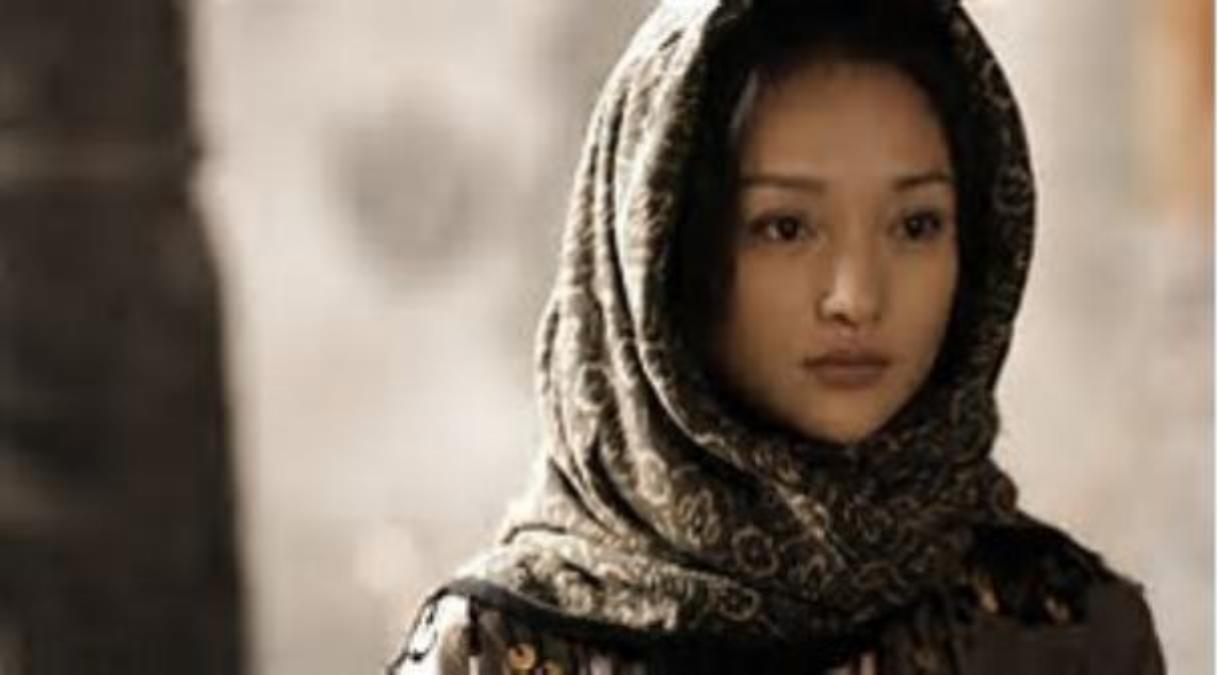

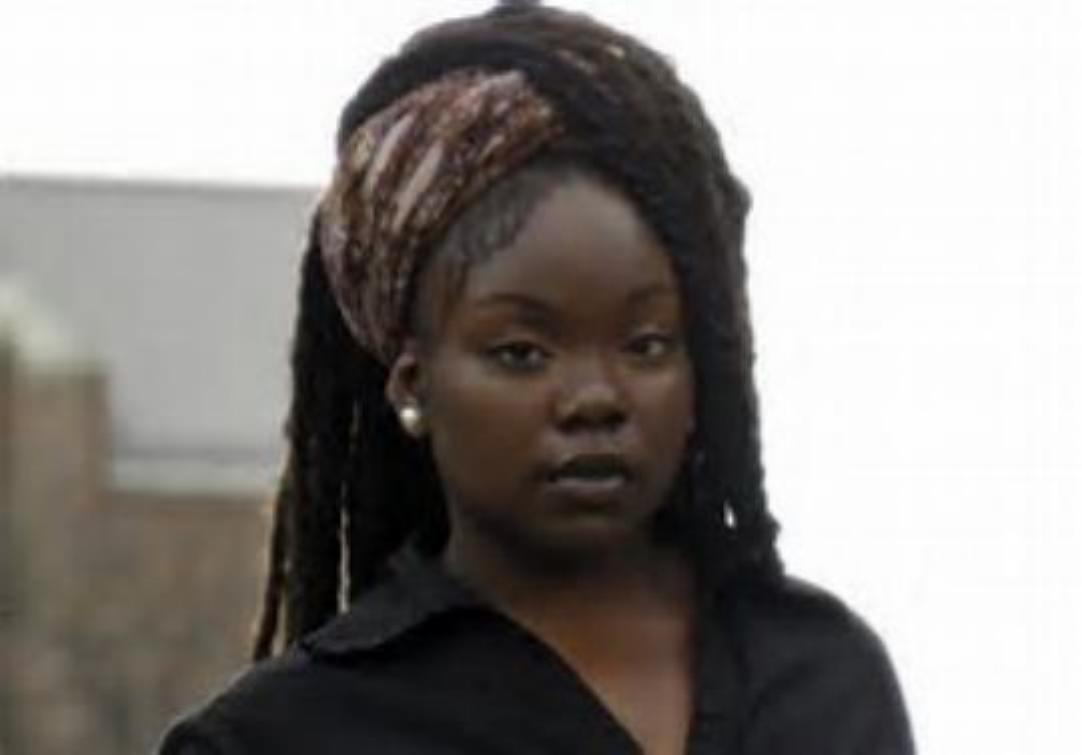

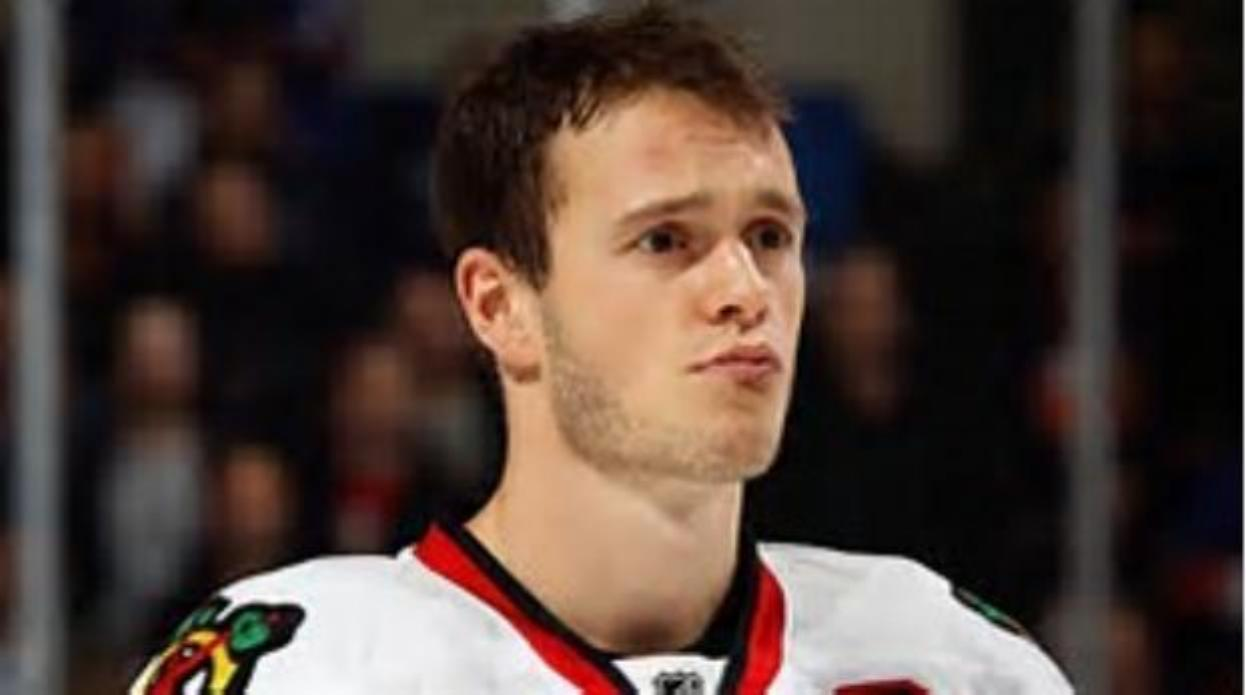

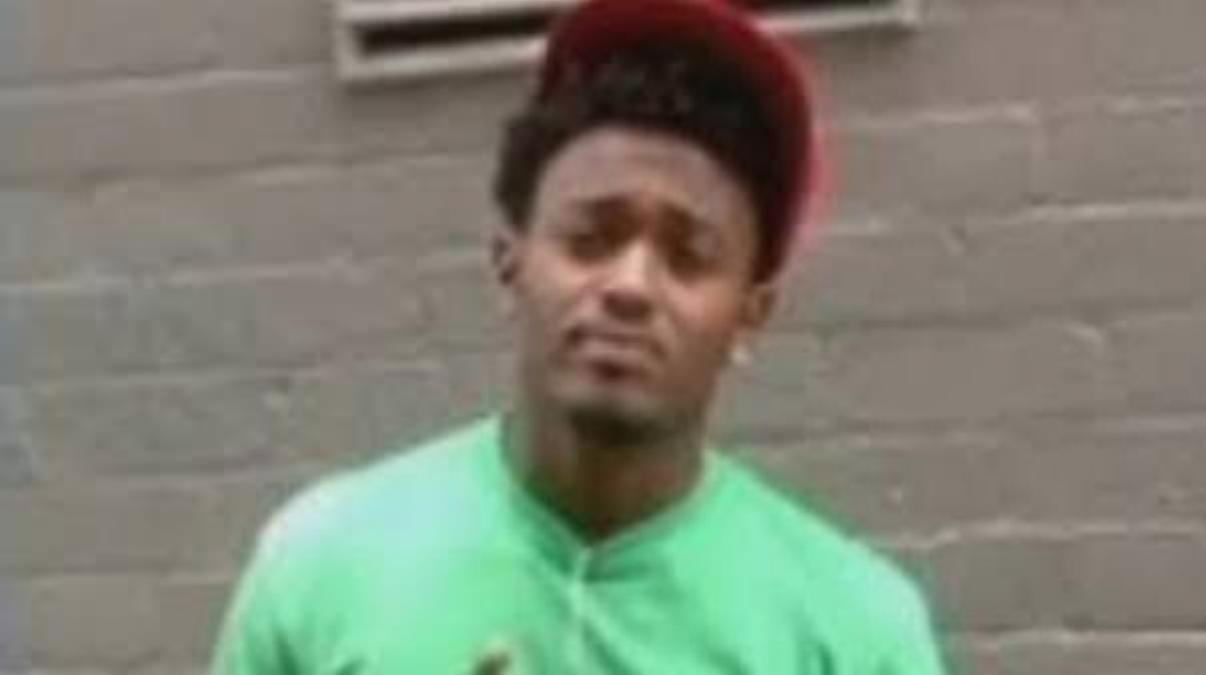

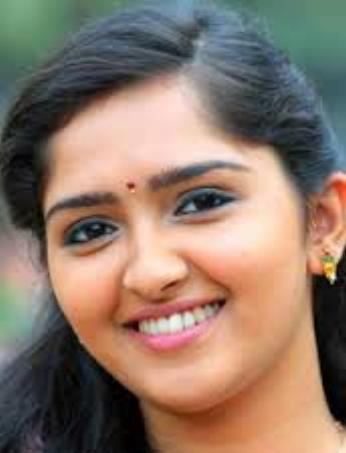

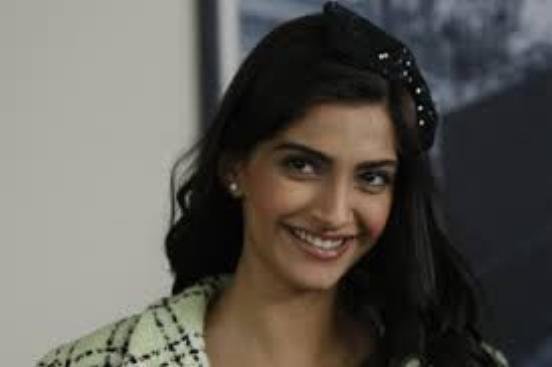

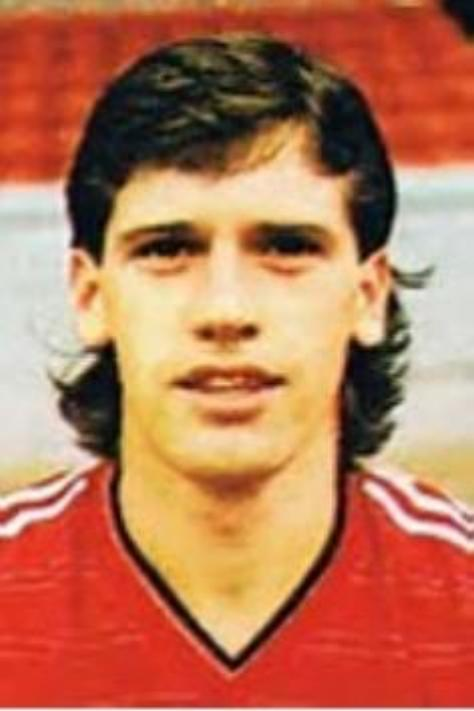



------ 4 ------





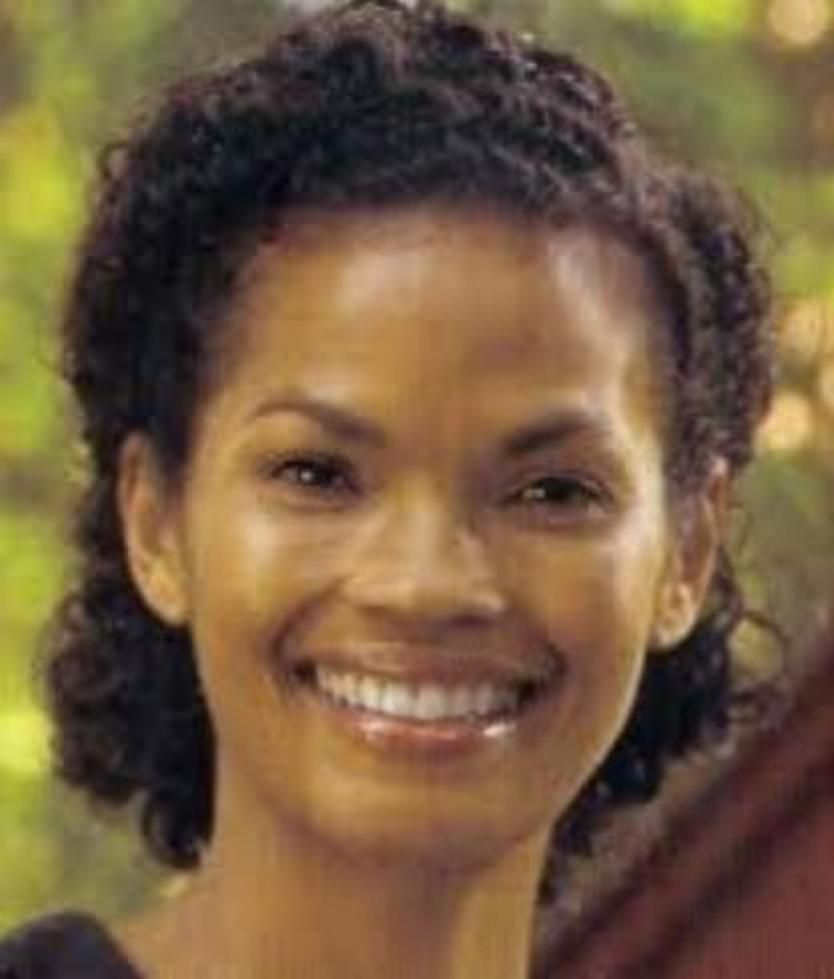

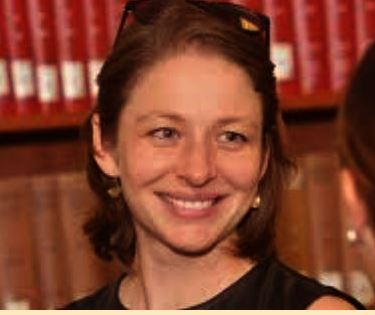

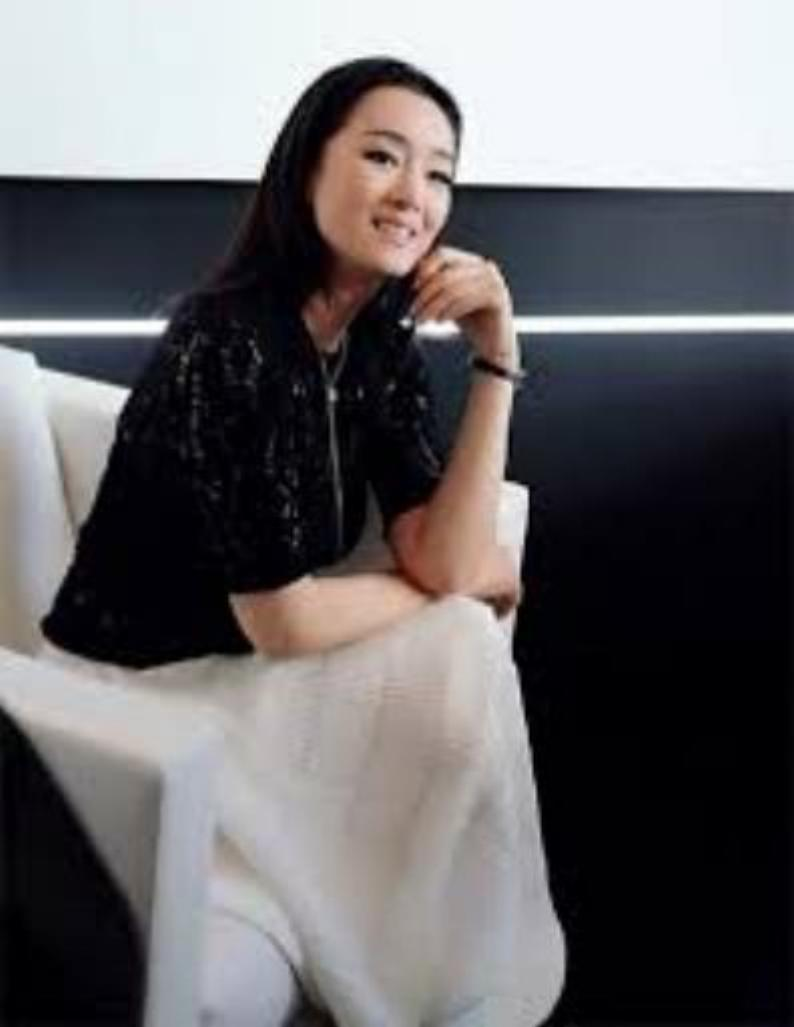

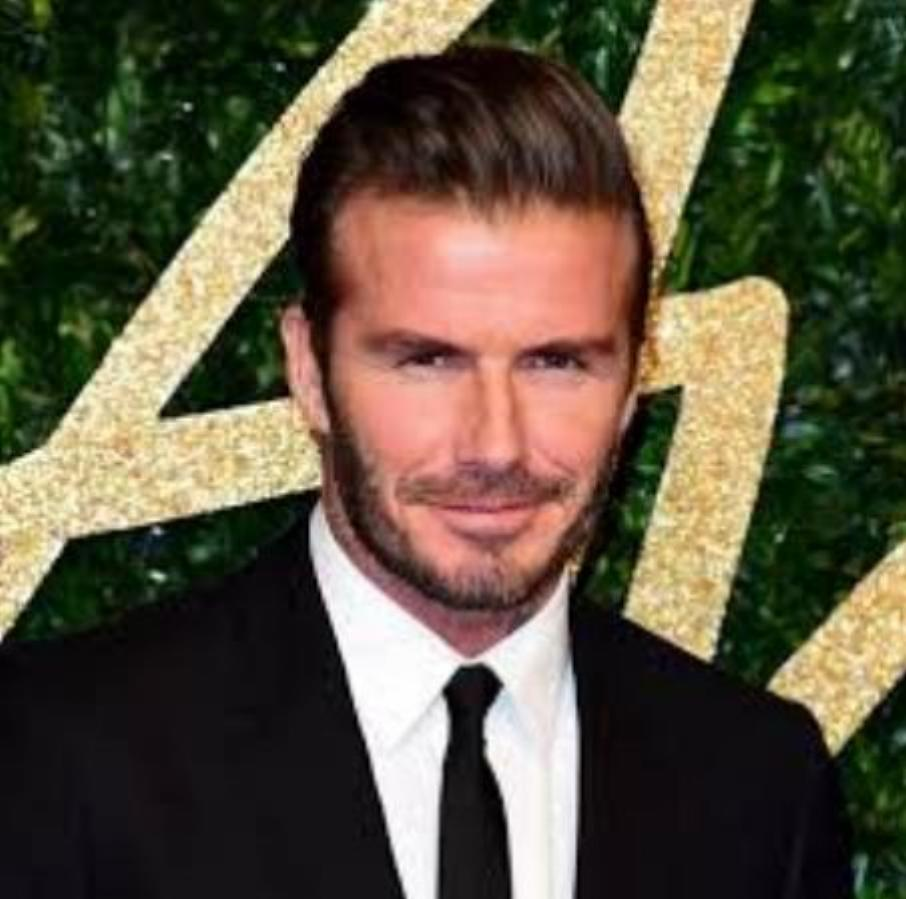

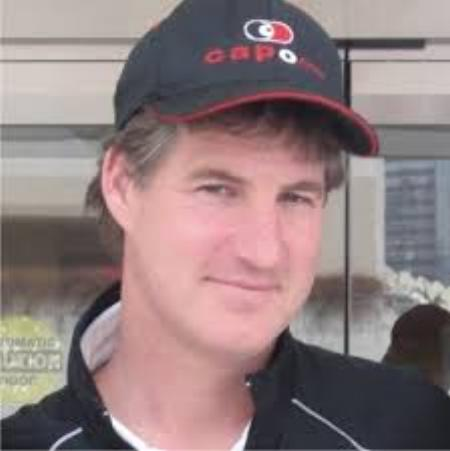

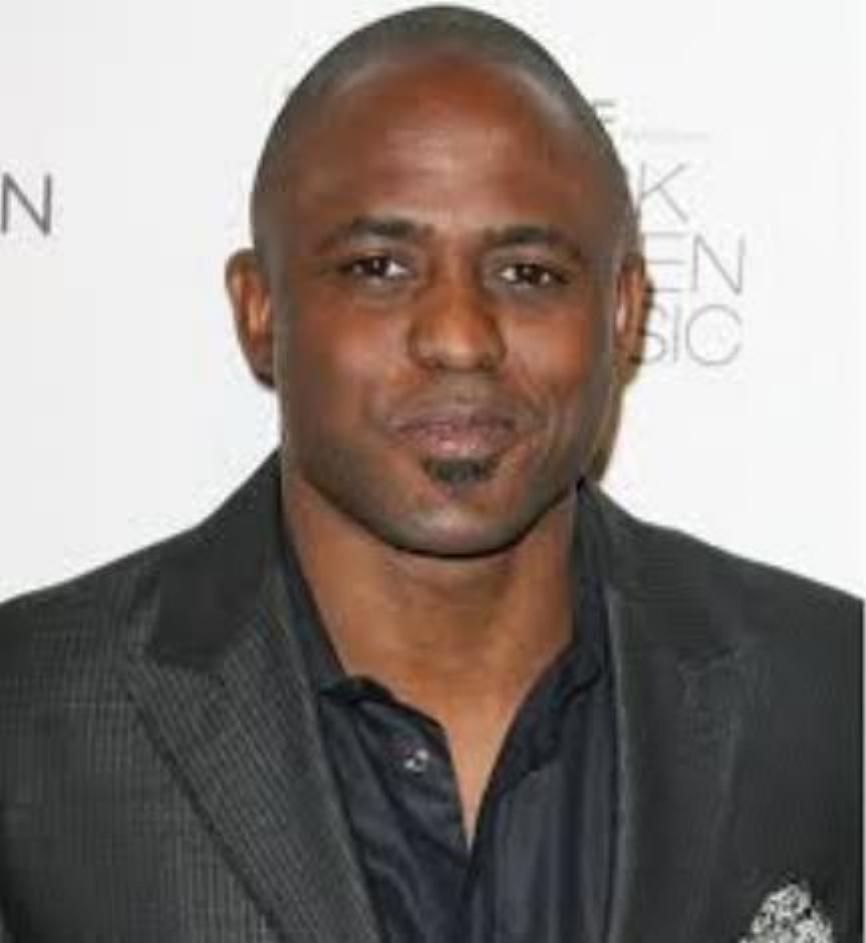

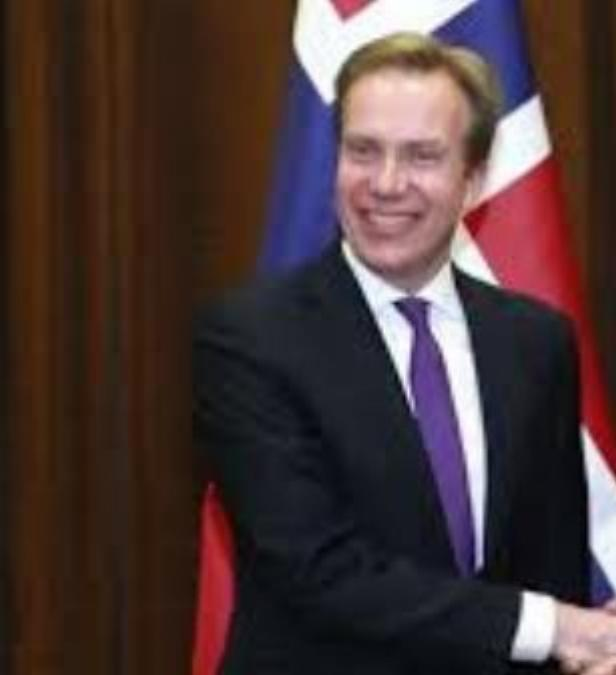

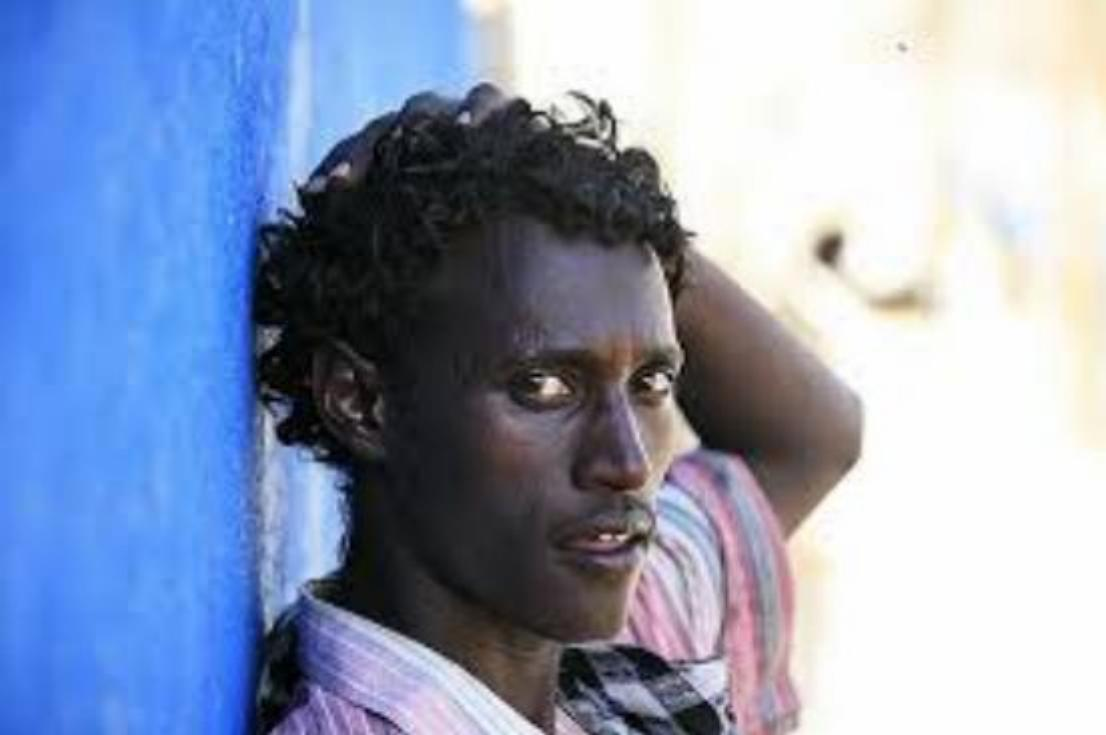

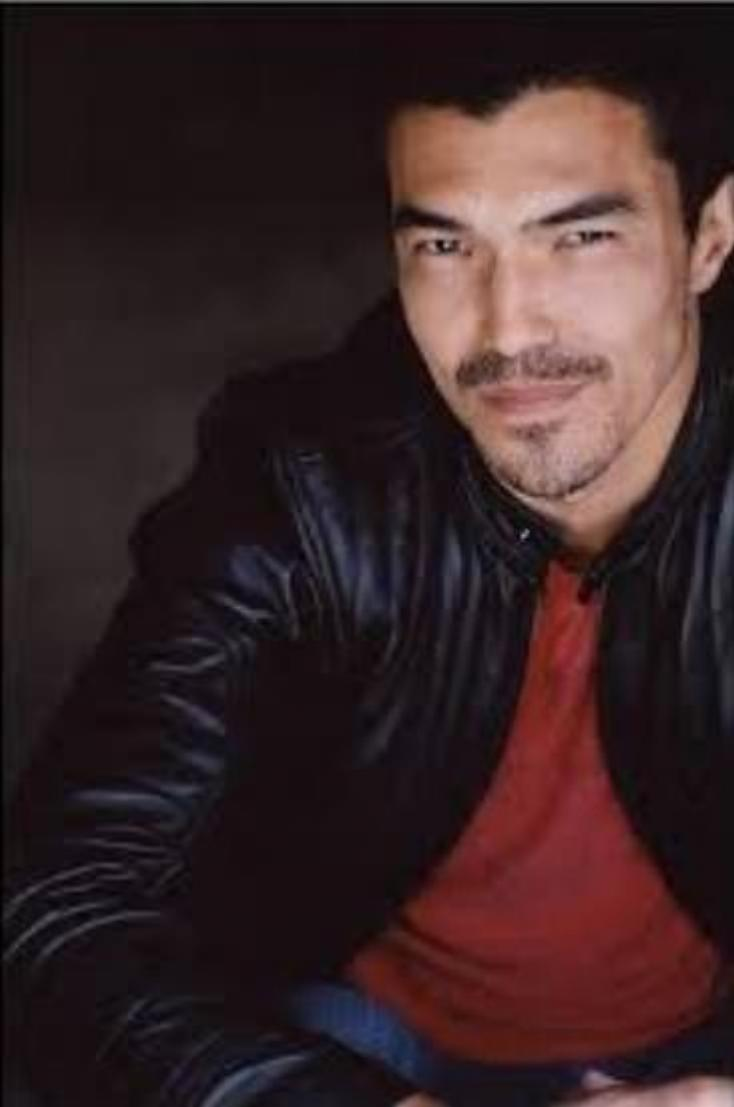

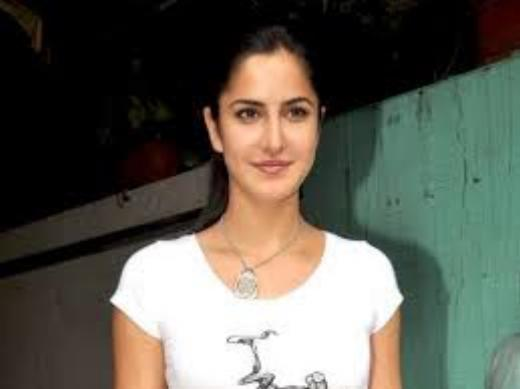



------ 5 ------





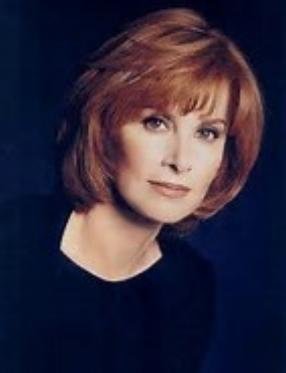

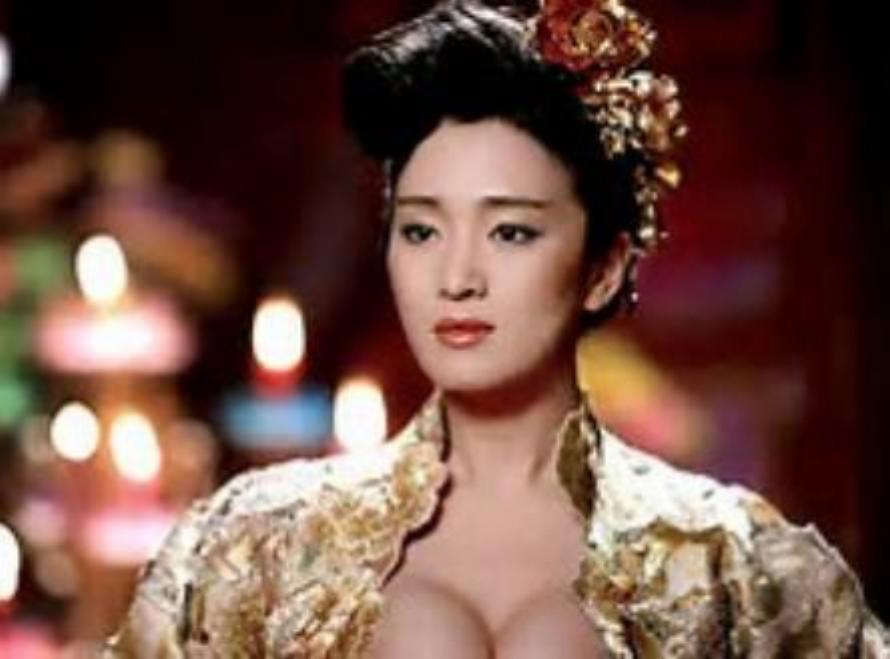

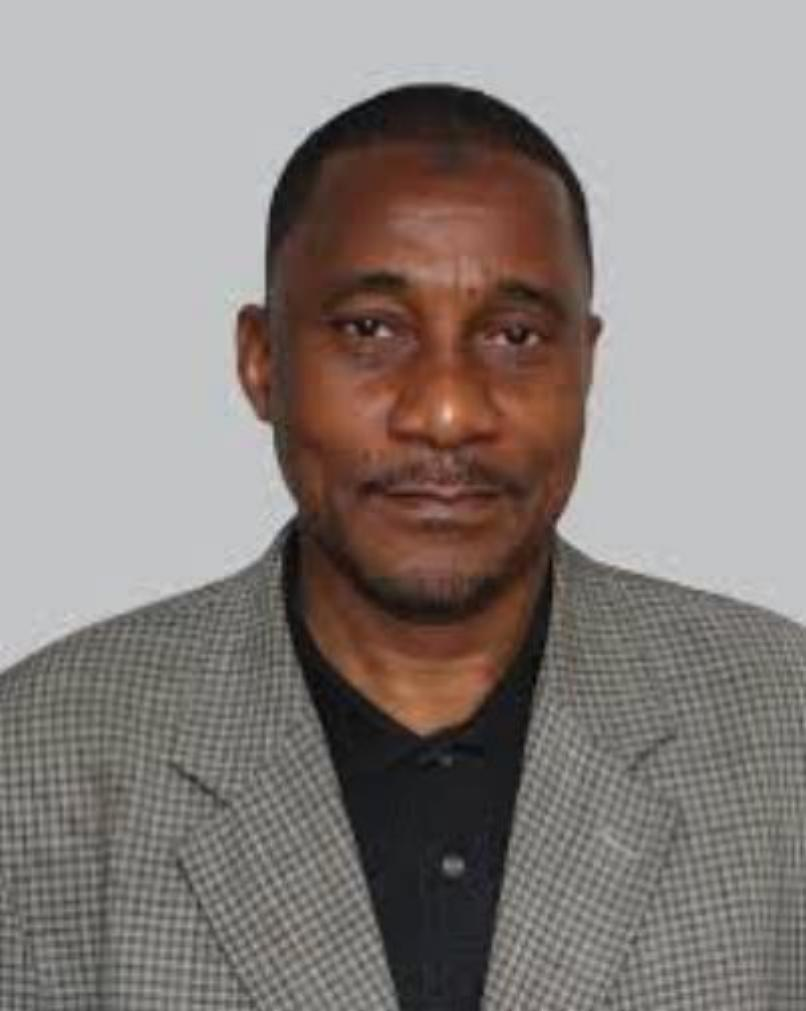

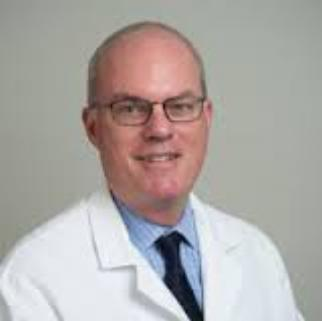

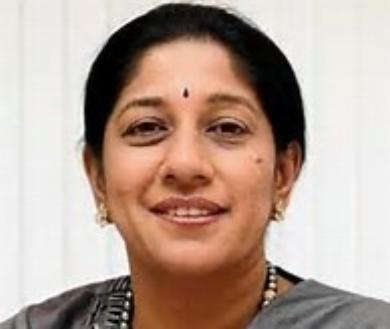

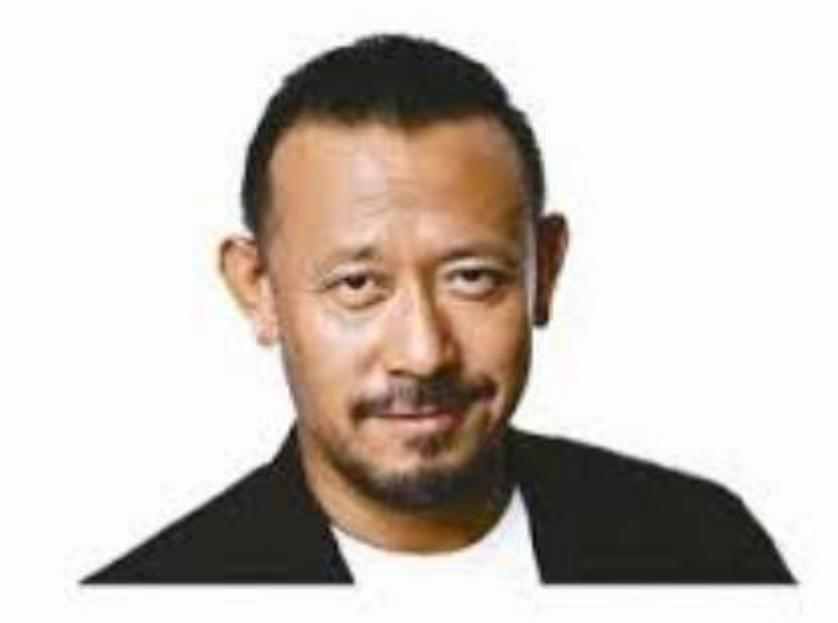

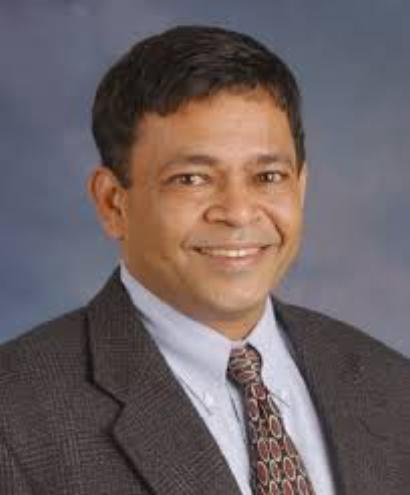

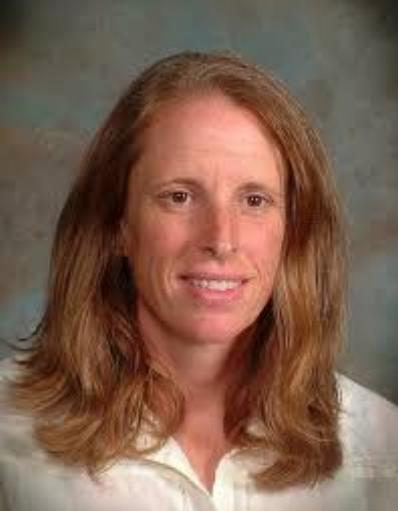

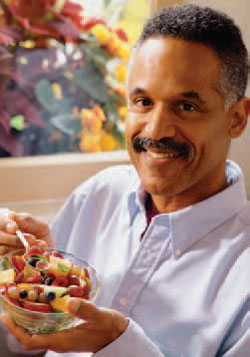

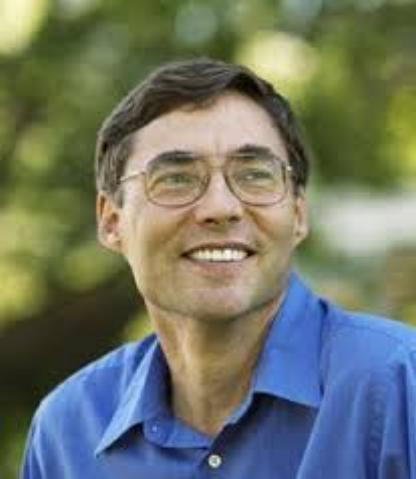



------ 6 ------





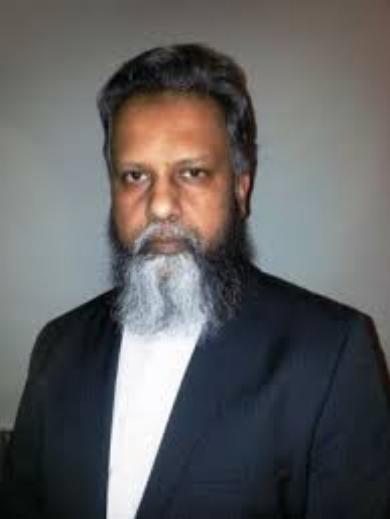

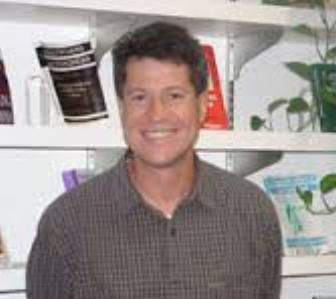

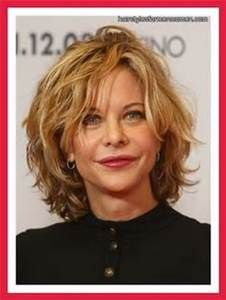

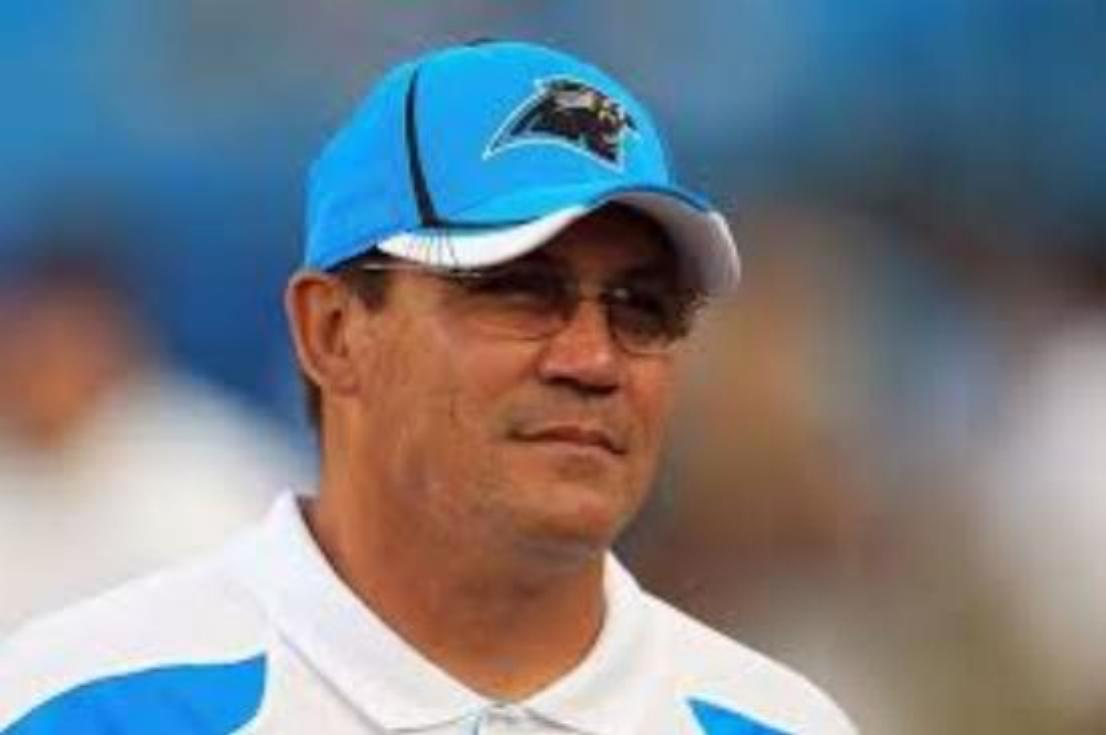

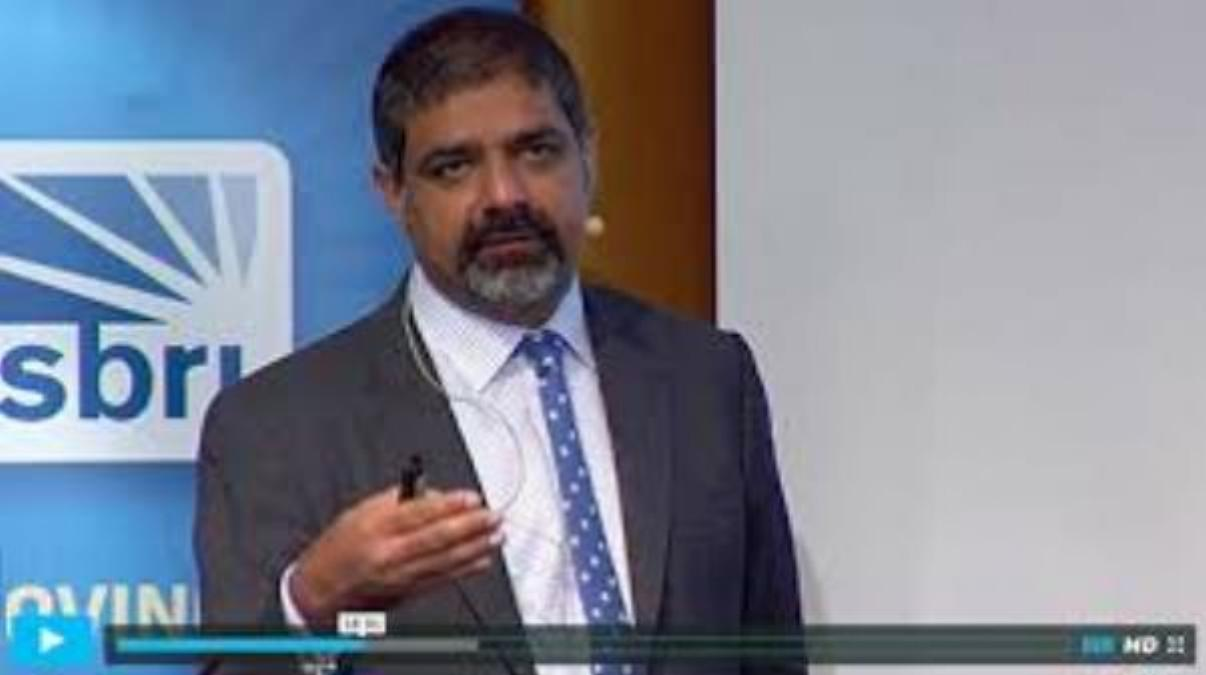

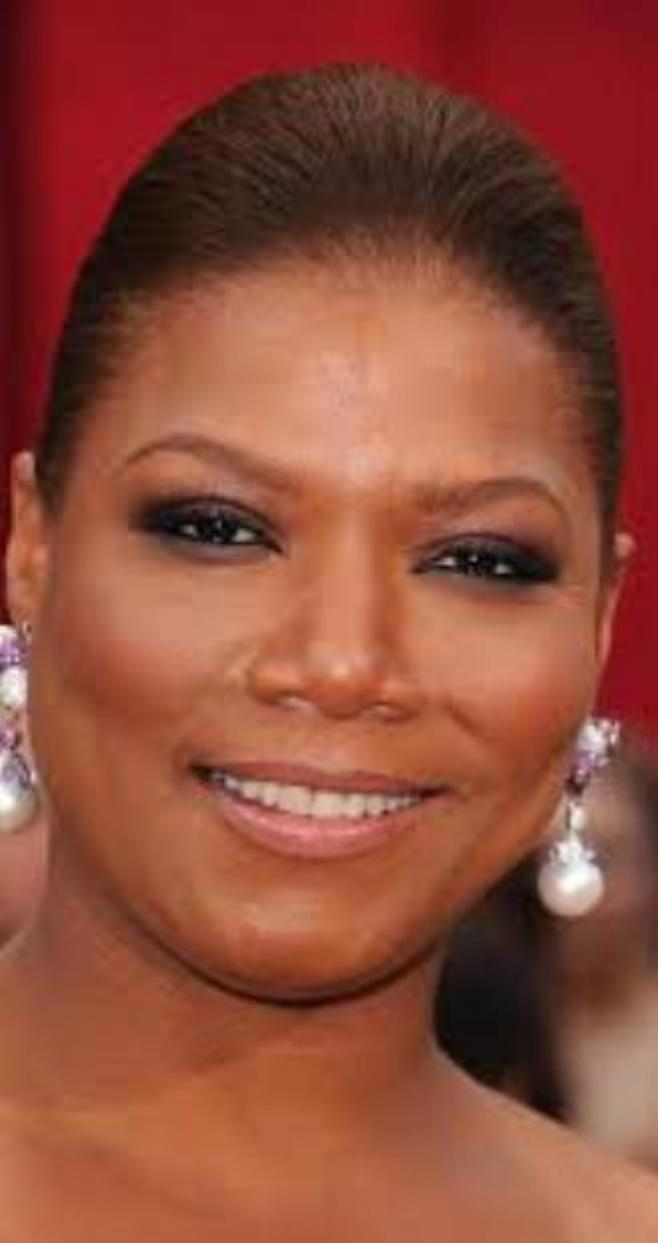

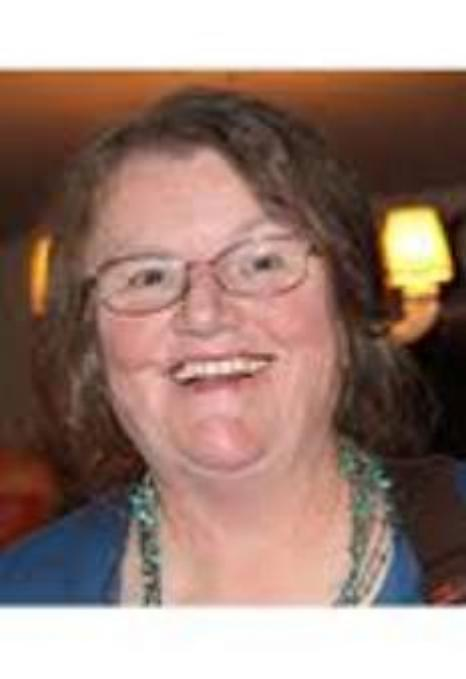

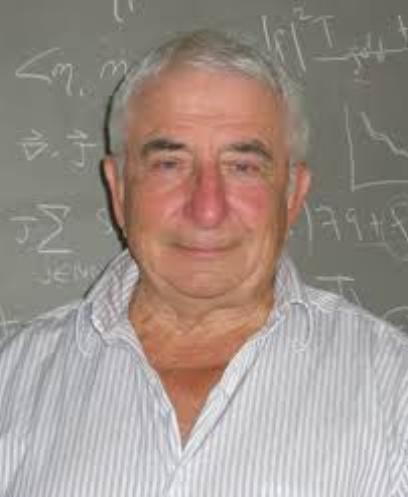

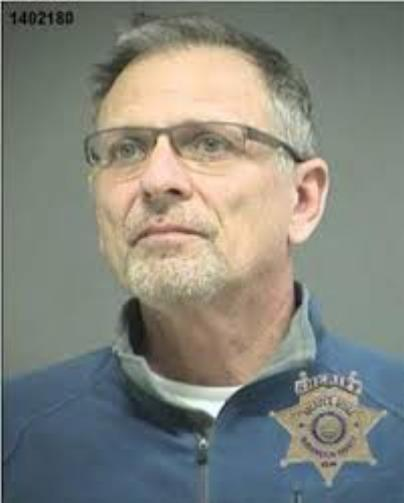

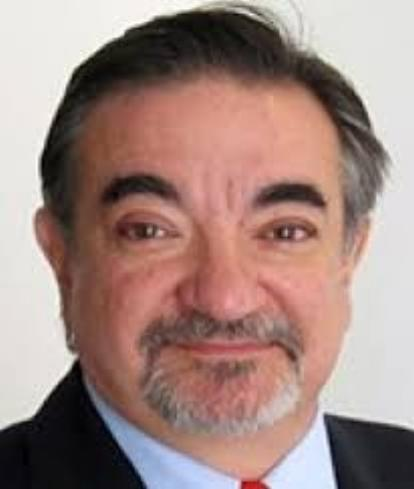



------ 7 ------





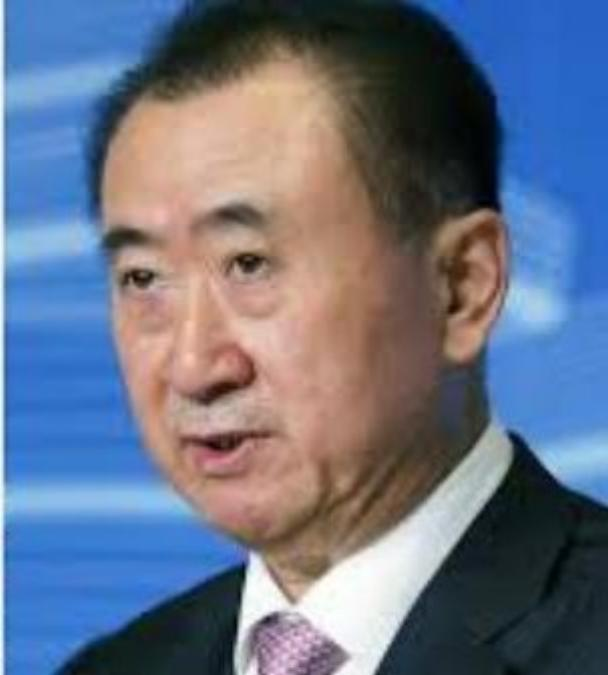

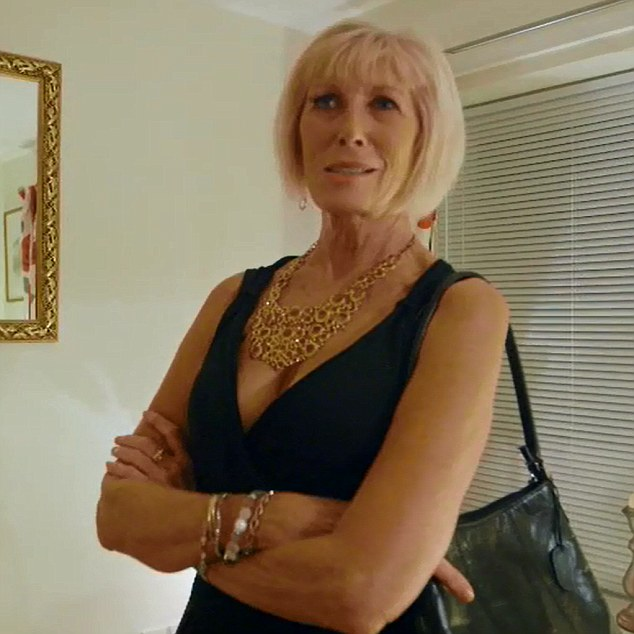

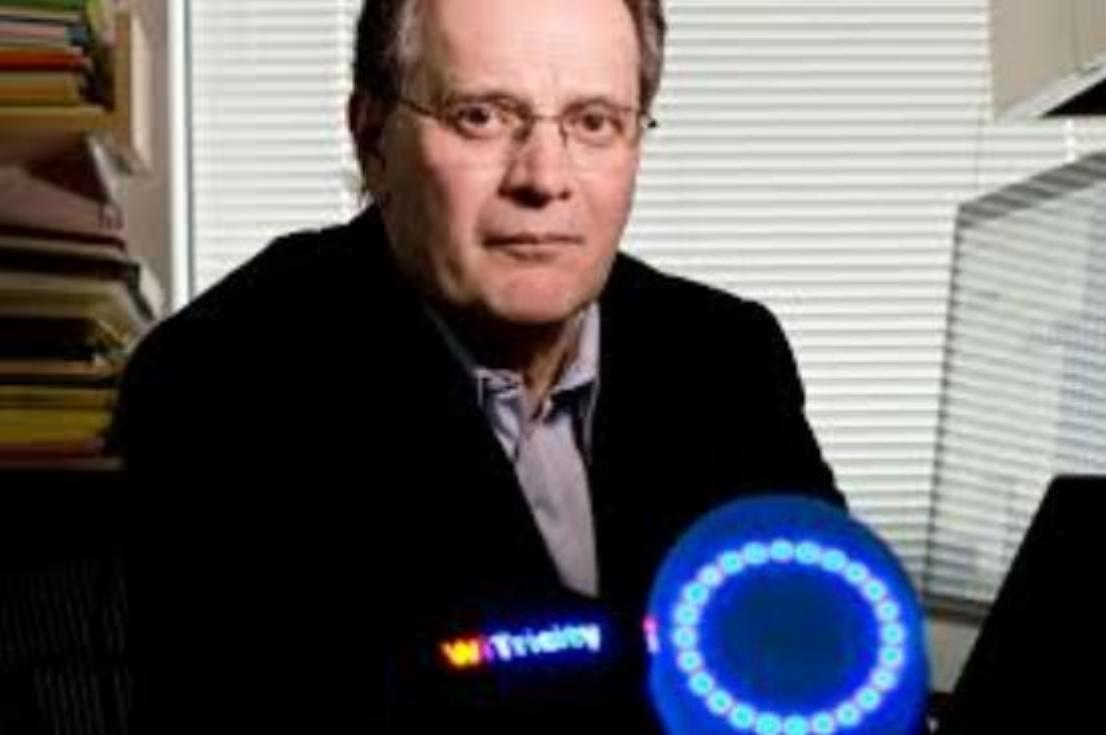

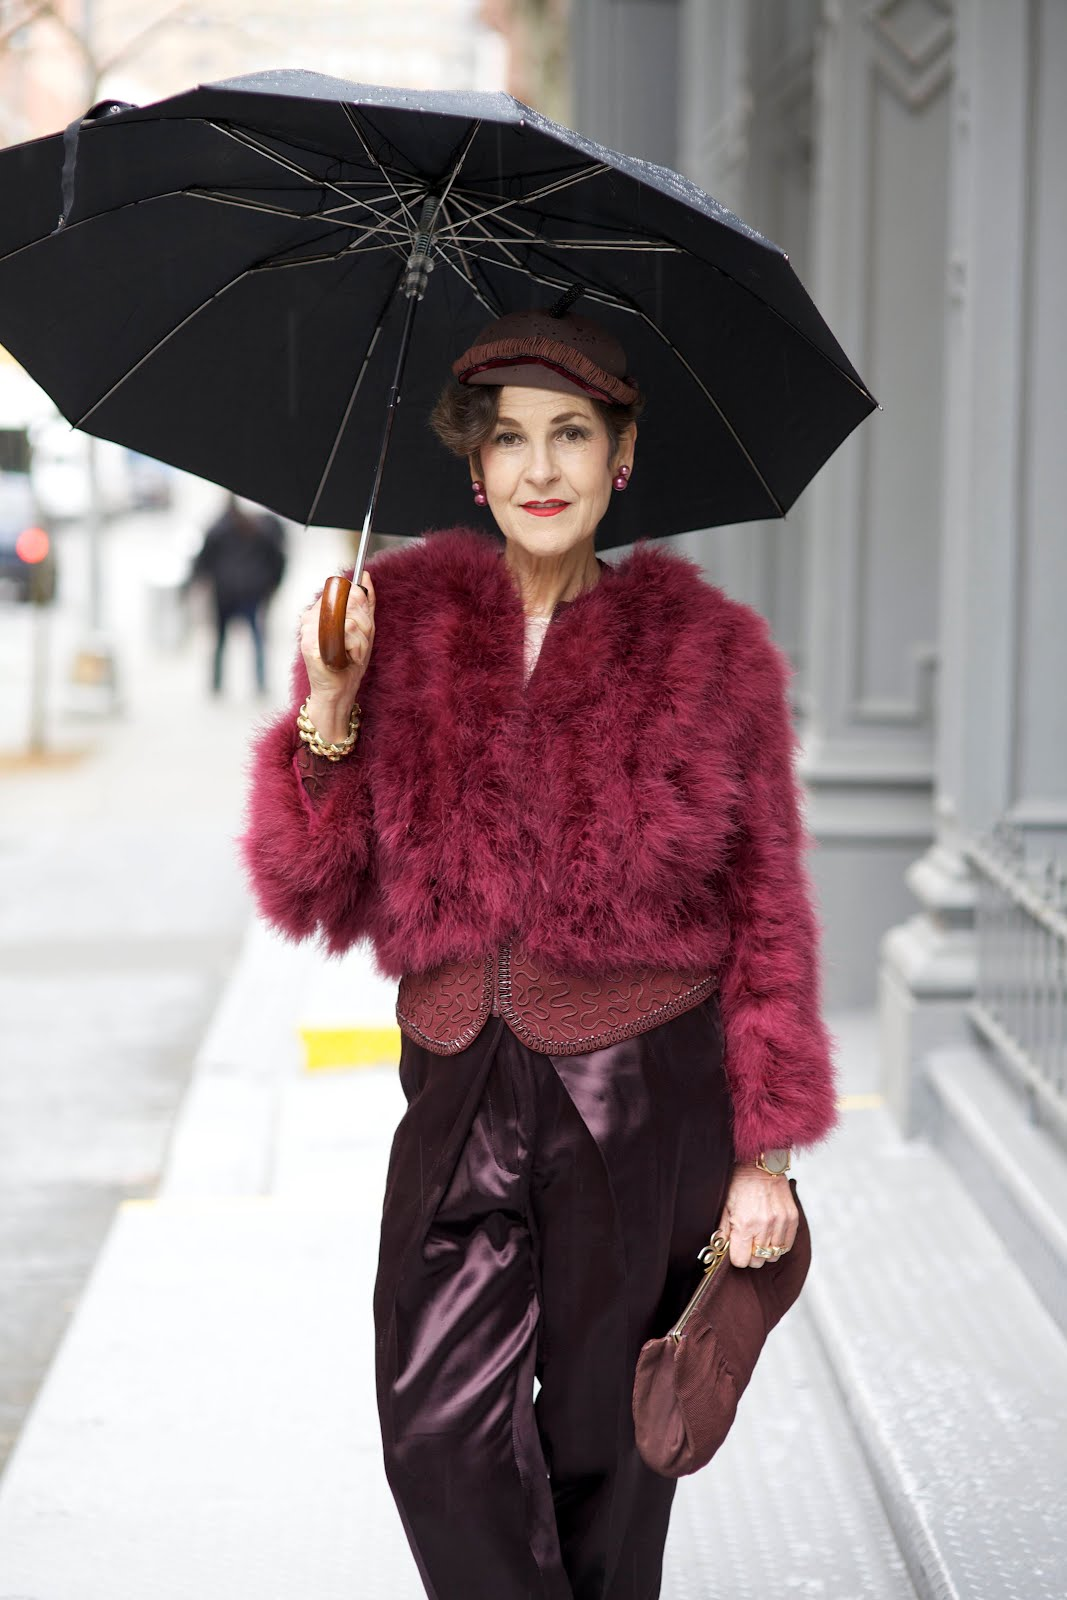

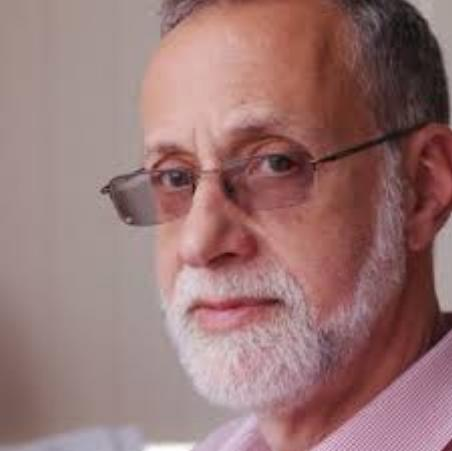

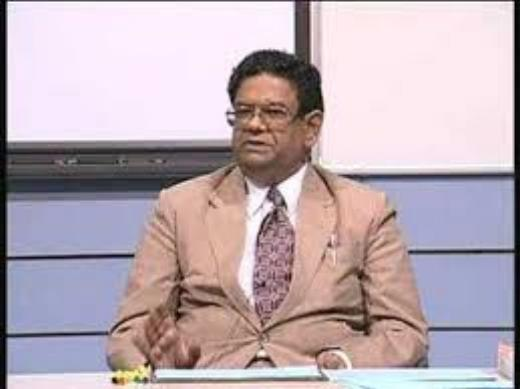

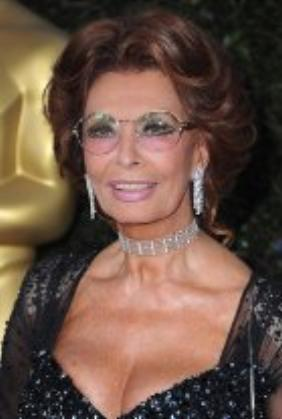

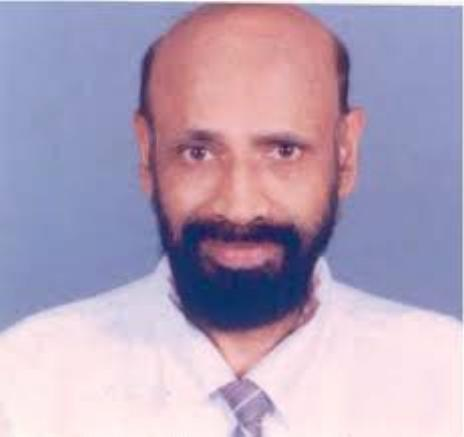

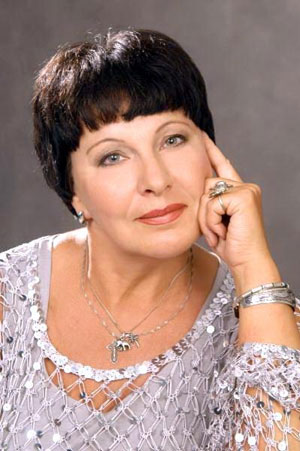

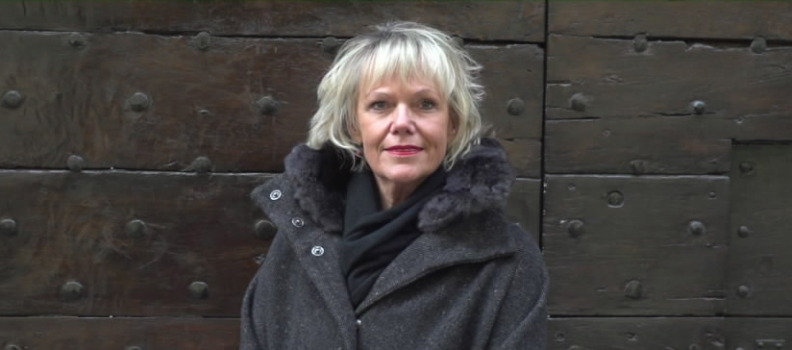



------ 8 ------





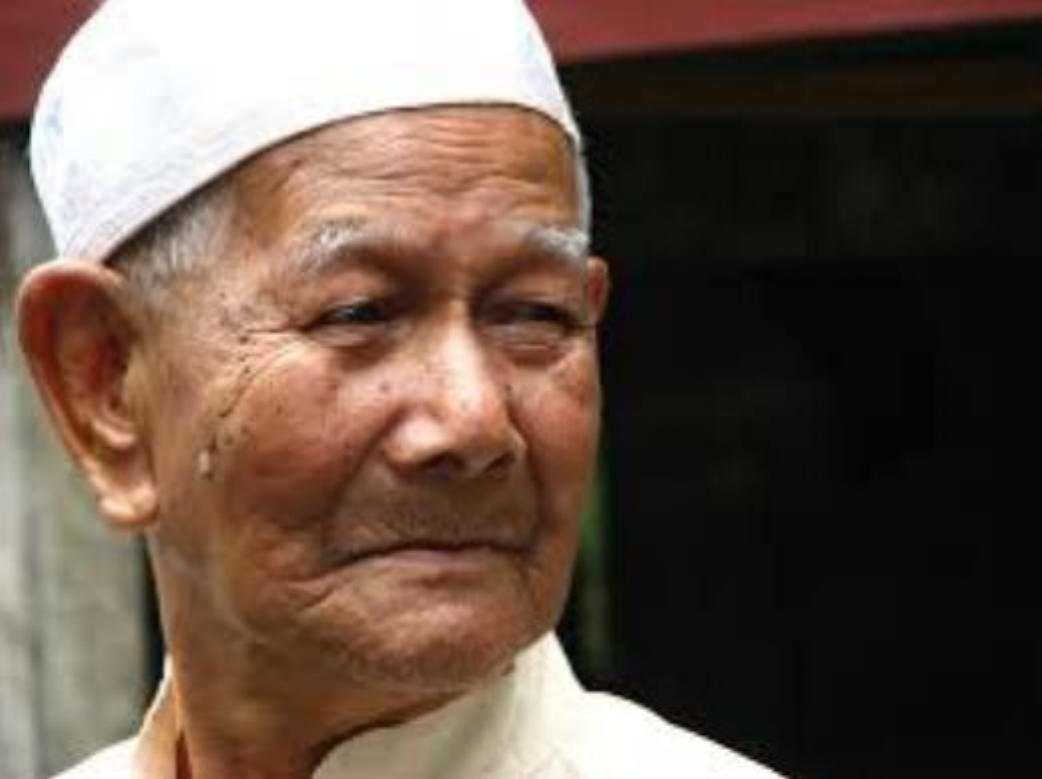

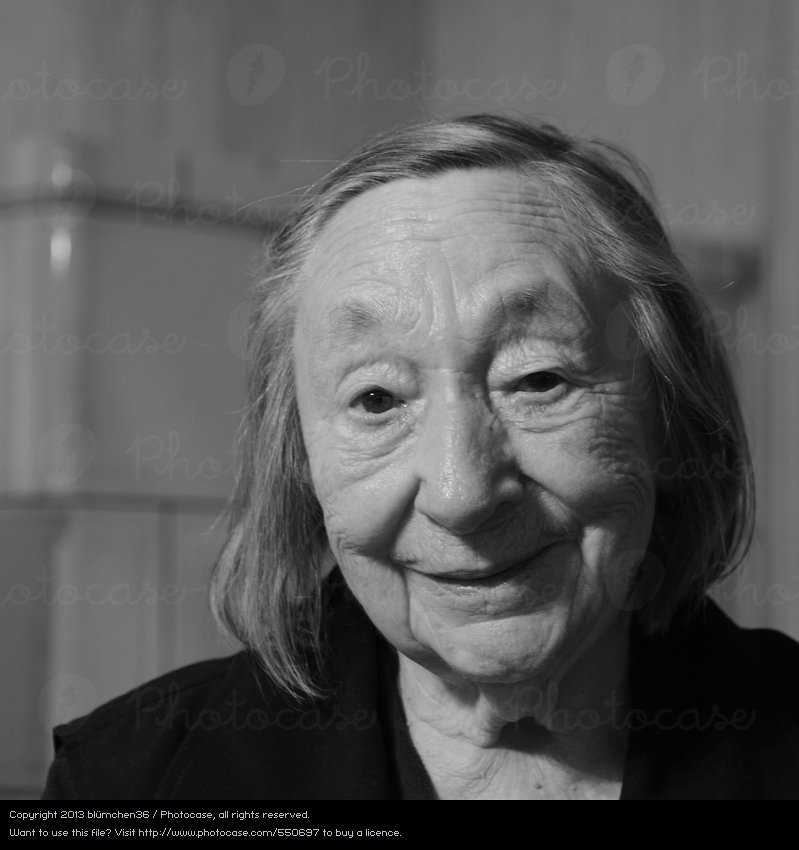

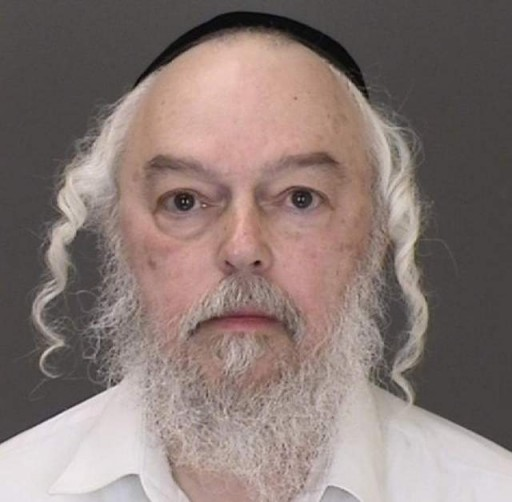

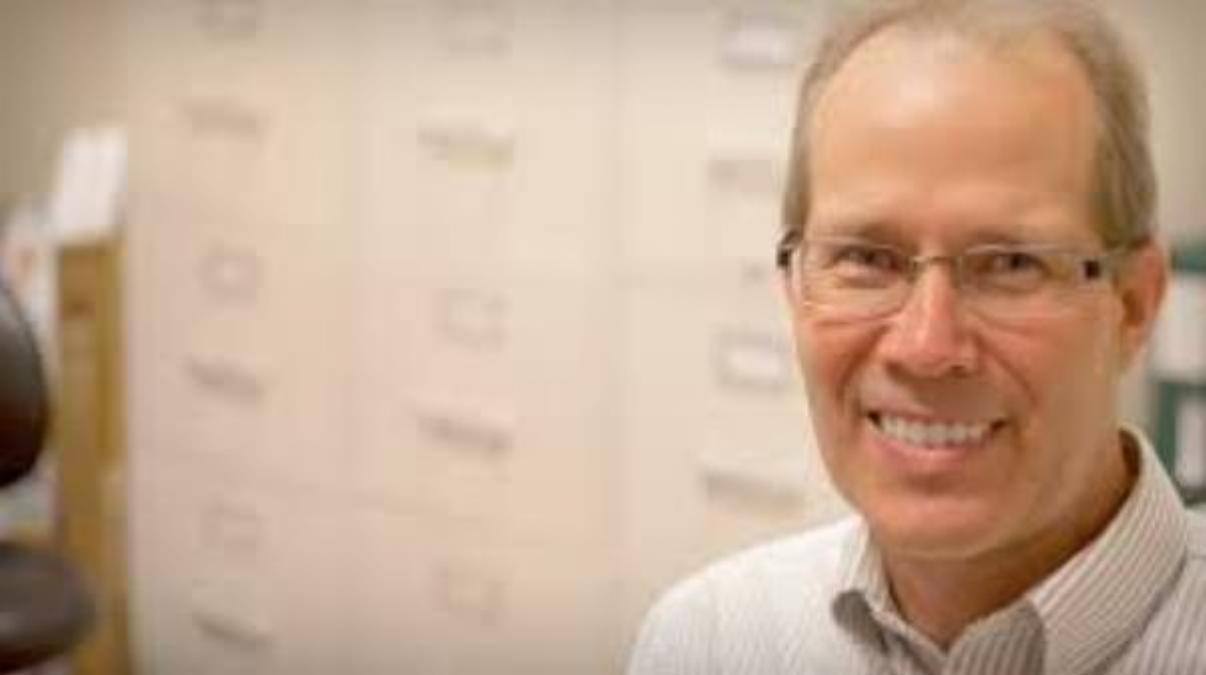

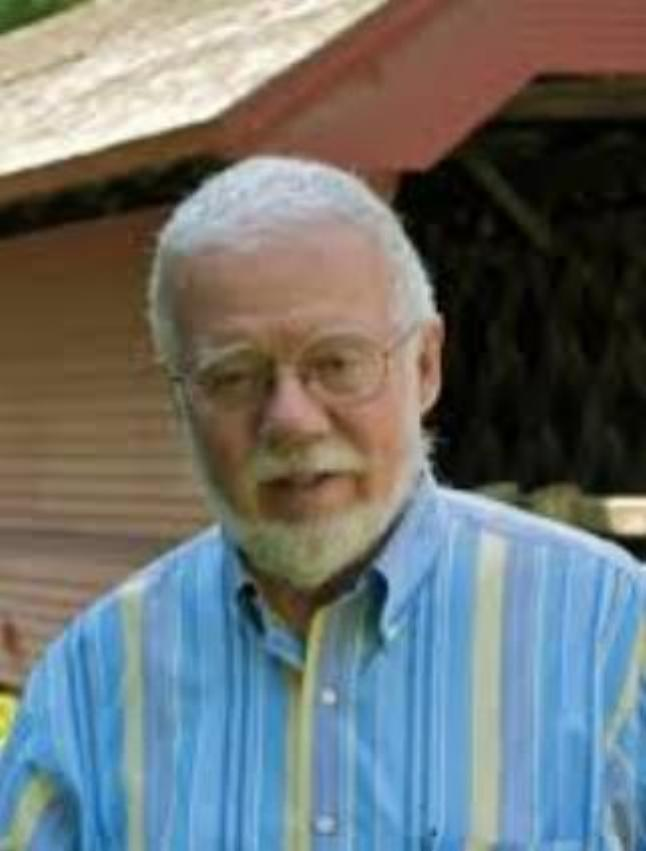

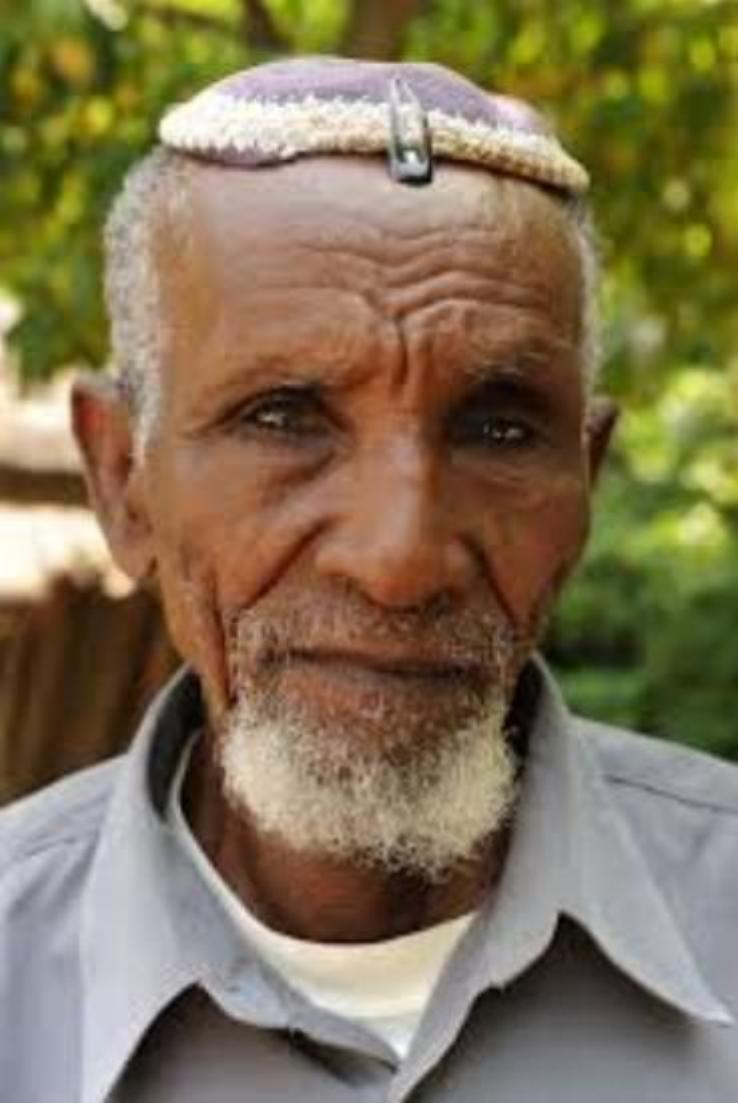

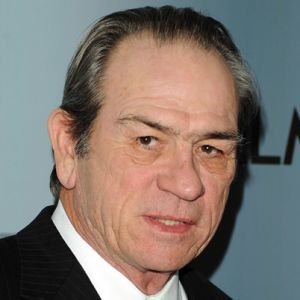

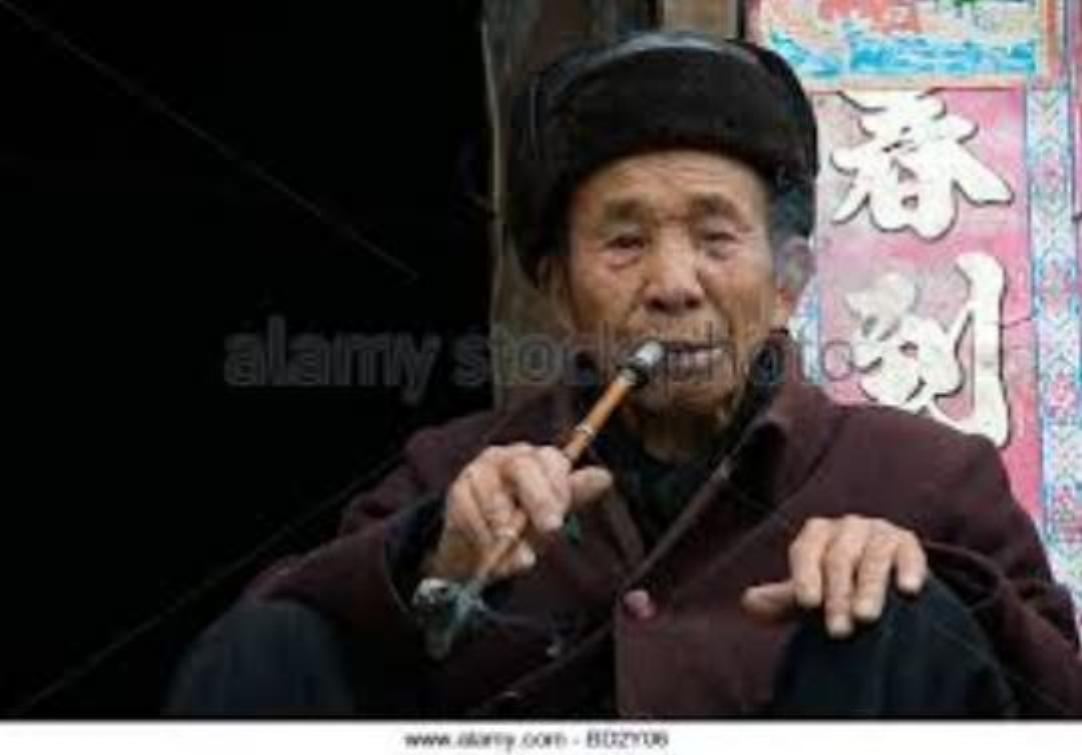

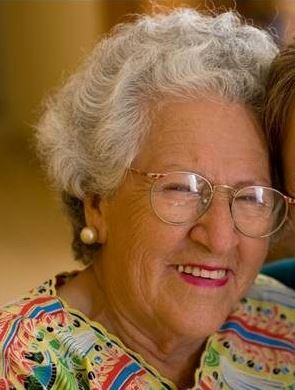

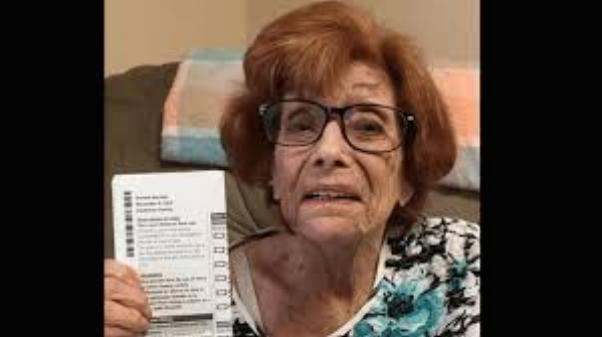

In [8]:
from IPython.display import Image, display

age_codes = list(set(df_utkface_raw['age_code']))

for code in age_codes:
    print(f"\n\n------ {code} ------\n\n\n")
    # Display 10 random images
    df_age = df_utkface_raw[df_utkface_raw['age_code'] == code]
    df_age = df_age.sample(10)
    for index, row in df_age.iterrows():
        image_path = row['file']
        # Display the image
        display(Image(filename=image_path, width=200))

# IMDB